<a href="https://colab.research.google.com/github/Sage1ll1001/TD_ML/blob/main/A2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHASE 1

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

##STEP 1 — DATA IMPORT & PREPROCESSING

In [154]:
from google.colab import files
uploaded = files.upload()

Saving Global_Pollution_Analysis.csv to Global_Pollution_Analysis (2).csv


In [155]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
print("Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:")
df.head()

Shape: (200, 13)

Column Names:
 ['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)', 'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)', 'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)', 'GDP_Per_Capita (in USD)']

Data Types:
 Country                                    object
Year                                        int64
Air_Pollution_Index                       float64
Water_Pollution_Index                     float64
Soil_Pollution_Index                      float64
Industrial_Waste (in tons)                float64
Energy_Recovered (in GWh)                 float64
CO2_Emissions (in MT)                     float64
Renewable_Energy (%)                      float64
Plastic_Waste_Produced (in tons)          float64
Energy_Consumption_Per_Capita (in MWh)    float64
Population (in millions)                  float64
GDP_Per_Capita (in U

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [156]:
#  1.2 Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\nMissing % per column:")
print((df.isnull().mean() * 100).round(2))


--- Missing Values ---
Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

Missing % per column:
Country                                   0.0
Year                                      0.0
Air_Pollution_Index                       0.0
Water_Pollution_Index                     0.0
Soil_Pollution_Index                      0.0
Industrial_Waste (in tons)                0.0
Energy_Recovered (in GWh)                 0.0
CO2_Emissions (in MT)                     0.0


In [157]:
# Impute numeric columns with median (robust to outliers)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
print("\n✔ Median imputation applied. Remaining nulls:", df.isnull().sum().sum())


✔ Median imputation applied. Remaining nulls: 0


In [6]:
#  1.3 Data Transformation


In [158]:
# Normalize pollution indices (MinMax → 0 to 1)
pollution_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
scaler = MinMaxScaler()
df[['Air_Pollution_Scaled', 'Water_Pollution_Scaled', 'Soil_Pollution_Scaled']] = \
    scaler.fit_transform(df[pollution_cols])
print("\n✔ Pollution indices normalized (MinMax 0–1)")


✔ Pollution indices normalized (MinMax 0–1)


In [159]:
# Label Encode: Country
le = LabelEncoder()
df['Country_Encoded'] = le.fit_transform(df['Country'])
print(f"✔ Label Encoding: 'Country' → {df['Country'].nunique()} unique values")

✔ Label Encoding: 'Country' → 175 unique values


In [160]:
# One-Hot Encode: Year
df = pd.get_dummies(df, columns=['Year'], prefix='Year')
year_cols = [c for c in df.columns if c.startswith('Year_')]
print(f"✔ One-Hot Encoding: 'Year' → {len(year_cols)} binary columns")
print(f"\nFinal dataset shape: {df.shape}")

✔ One-Hot Encoding: 'Year' → 20 binary columns

Final dataset shape: (200, 36)


## STEP 2 — EXPLORATORY DATA ANALYSIS (EDA)

In [161]:
#  2.1 Descriptive Statistics
stat_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
             'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)',
             'Energy_Recovered (in GWh)', 'Renewable_Energy (%)',
             'Plastic_Waste_Produced (in tons)', 'GDP_Per_Capita (in USD)']

print("\n--- Descriptive Statistics ---")
print(df[stat_cols].describe().round(2))


--- Descriptive Statistics ---
       Air_Pollution_Index  Water_Pollution_Index  Soil_Pollution_Index  \
count               200.00                 200.00                200.00   
mean                180.63                 115.07                 76.49   
std                  67.07                  47.58                 39.69   
min                  50.30                  31.13                 11.15   
25%                 134.97                  74.55                 40.89   
50%                 183.38                 112.30                 78.60   
75%                 237.42                 157.48                109.21   
max                 297.95                 199.32                149.23   

       CO2_Emissions (in MT)  Industrial_Waste (in tons)  \
count                 200.00                      200.00   
mean                   24.88                    52891.68   
std                    14.47                    27224.49   
min                     1.92                     101

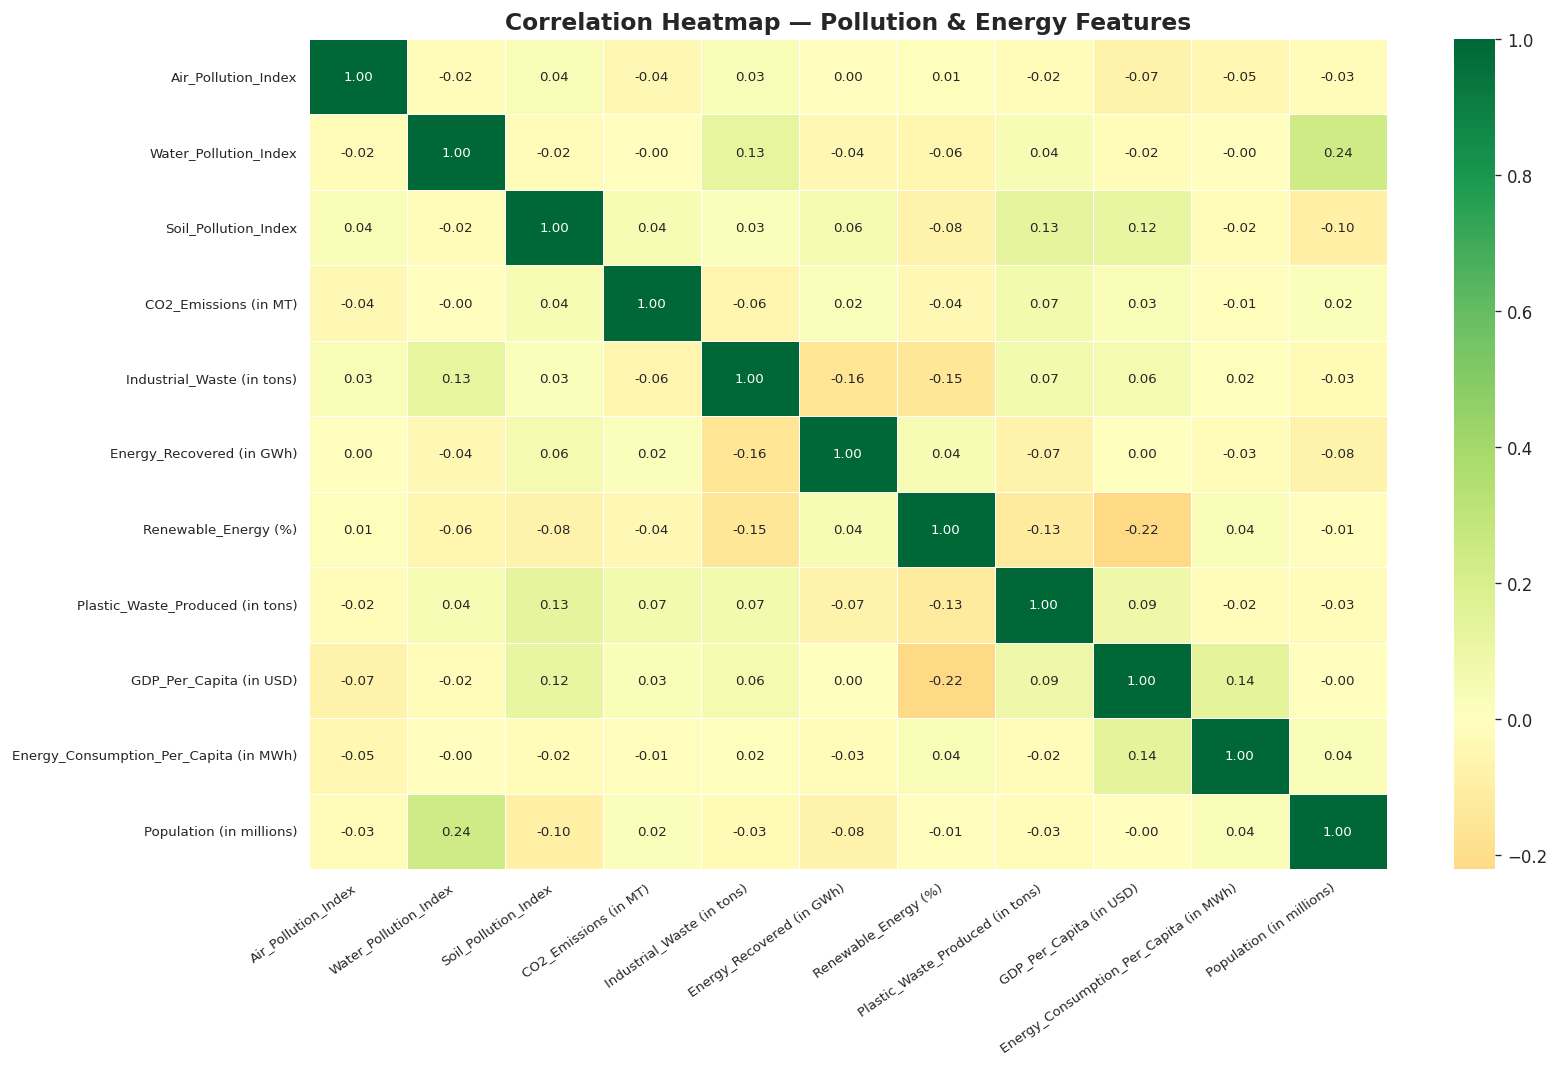

In [162]:
#  2.2 Correlation Heatmap
plt.figure(figsize=(14, 9))
corr = df[stat_cols + ['Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            linewidths=0.5, annot_kws={'size': 8})
plt.title("Correlation Heatmap — Pollution & Energy Features", fontsize=14, fontweight='bold')
plt.xticks(rotation=35, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [163]:
#  2.3 Visualization

# Reload original for year-based plots (before OHE dropped Year column)
df_orig = pd.read_csv('Global_Pollution_Analysis.csv')
numeric_cols_orig = df_orig.select_dtypes(include=np.number).columns.tolist()
df_orig[numeric_cols_orig] = SimpleImputer(strategy='median').fit_transform(df_orig[numeric_cols_orig])


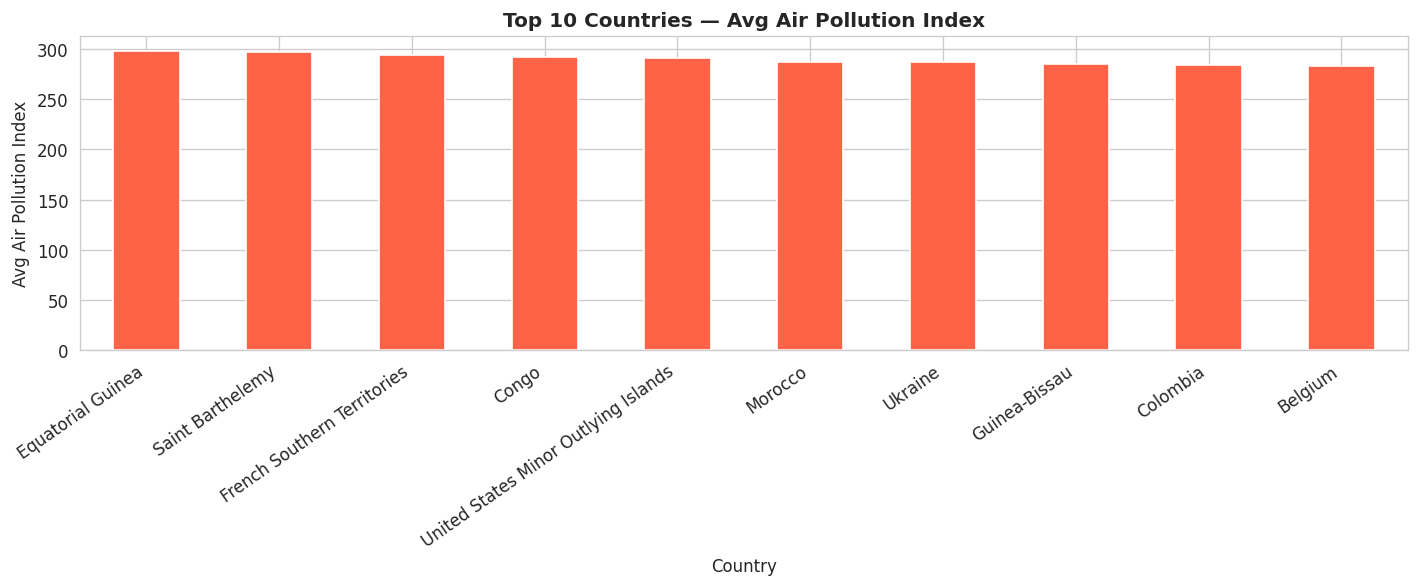

In [164]:
#  Bar Chart: Top 10 Countries by Avg Air Pollution
plt.figure(figsize=(12, 5))
top_air = df_orig.groupby('Country')['Air_Pollution_Index'].mean().nlargest(10)
top_air.plot(kind='bar', color='tomato', edgecolor='white')
plt.title("Top 10 Countries — Avg Air Pollution Index", fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Avg Air Pollution Index")
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

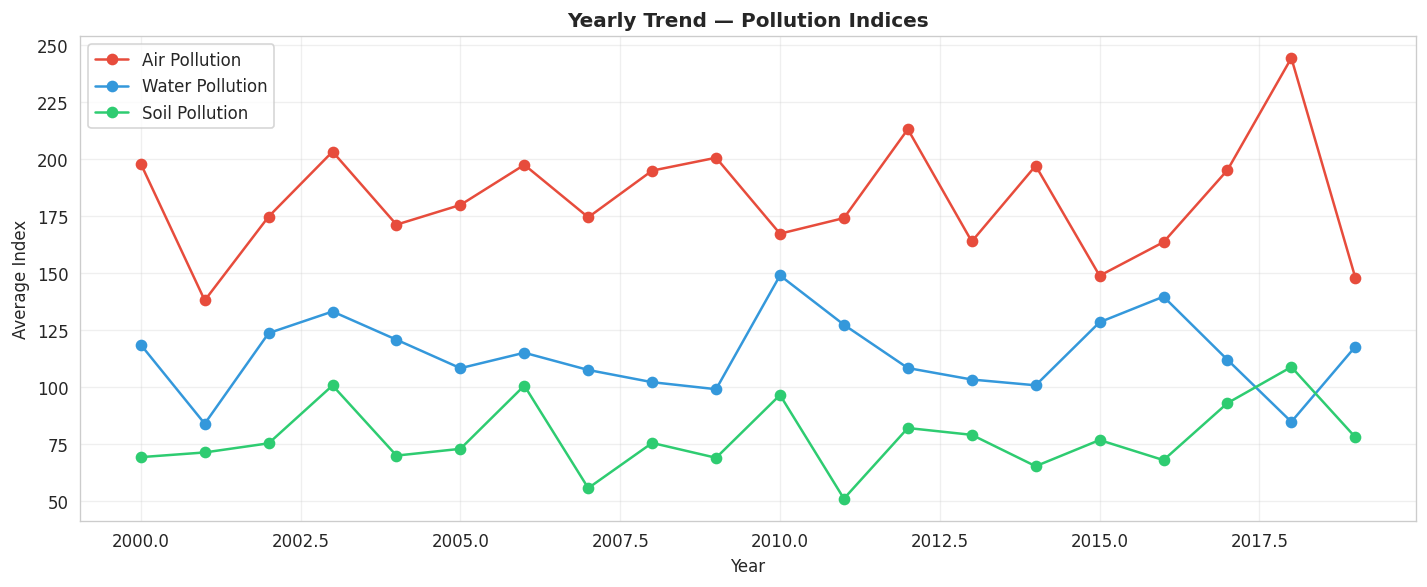

In [165]:
#  Line Plot: Yearly Trend of Pollution Indices
plt.figure(figsize=(12, 5))
yearly = df_orig.groupby('Year')[pollution_cols].mean()
for col, color in zip(pollution_cols, ['#e74c3c', '#3498db', '#2ecc71']):
    plt.plot(yearly.index, yearly[col], marker='o', label=col.replace('_Index','').replace('_',' '), color=color)
plt.title("Yearly Trend — Pollution Indices", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Average Index")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

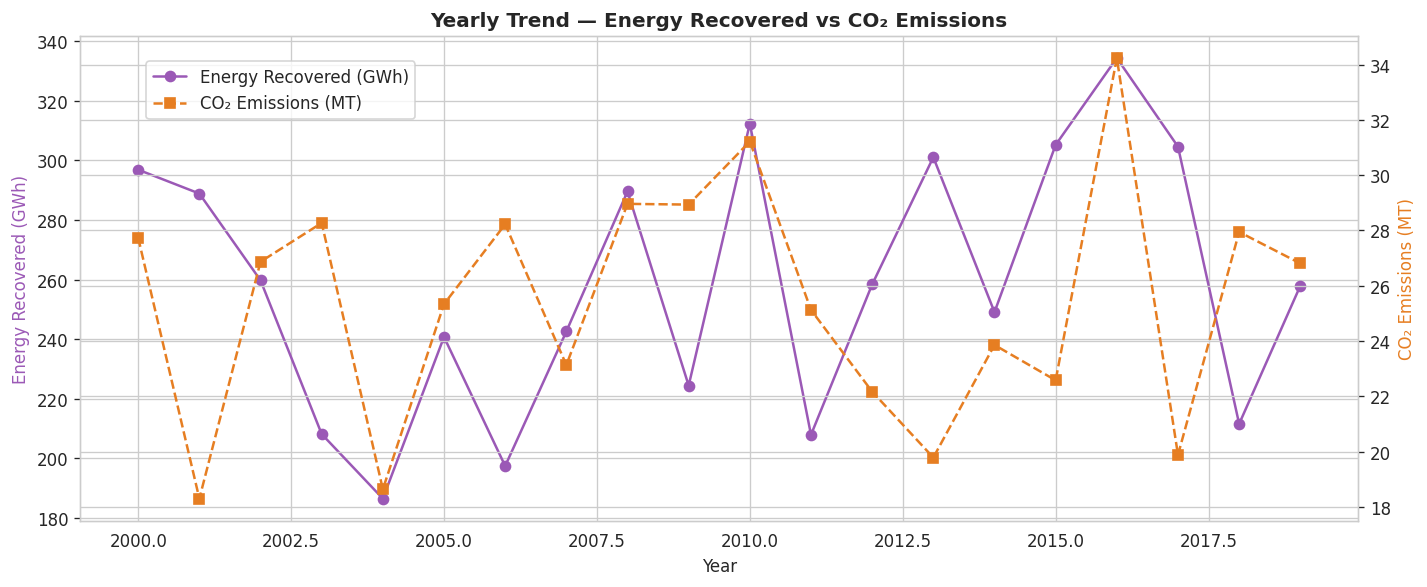

In [166]:
#  Line Plot: Yearly Energy Recovered & CO2 Emissions
fig, ax1 = plt.subplots(figsize=(12, 5))
yearly2 = df_orig.groupby('Year')[['Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)']].mean()
ax1.plot(yearly2.index, yearly2['Energy_Recovered (in GWh)'], color='#9b59b6', marker='o', label='Energy Recovered (GWh)')
ax1.set_ylabel("Energy Recovered (GWh)", color='#9b59b6')
ax2 = ax1.twinx()
ax2.plot(yearly2.index, yearly2['CO2_Emissions (in MT)'], color='#e67e22', marker='s', linestyle='--', label='CO₂ Emissions (MT)')
ax2.set_ylabel("CO₂ Emissions (MT)", color='#e67e22')
ax1.set_xlabel("Year")
plt.title("Yearly Trend — Energy Recovered vs CO₂ Emissions", fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

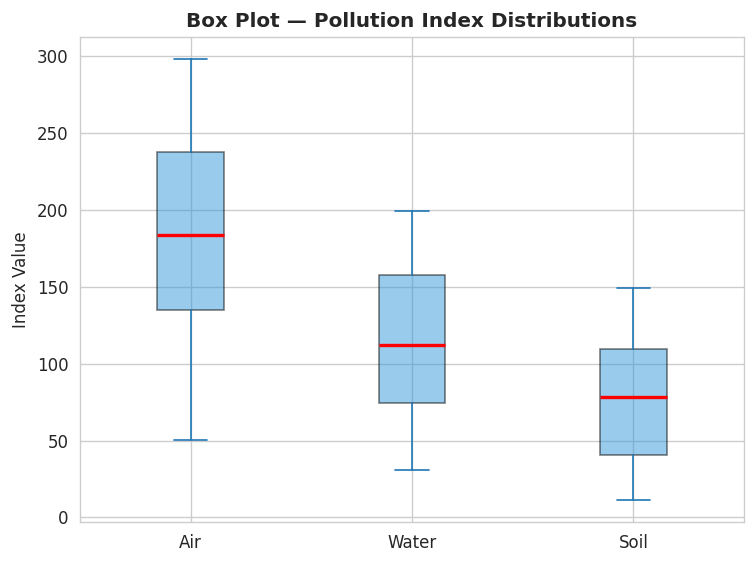

In [167]:
#  Box Plot: Pollution Indices Distribution
plt.figure(figsize=(10, 5))
df_orig[pollution_cols].plot(kind='box', patch_artist=True,
    boxprops=dict(facecolor='#3498db', alpha=0.5),
    medianprops=dict(color='red', linewidth=2))
plt.title("Box Plot — Pollution Index Distributions", fontweight='bold')
plt.ylabel("Index Value")
plt.xticks(ticks=[1,2,3], labels=['Air', 'Water', 'Soil'])
plt.tight_layout()
plt.show()

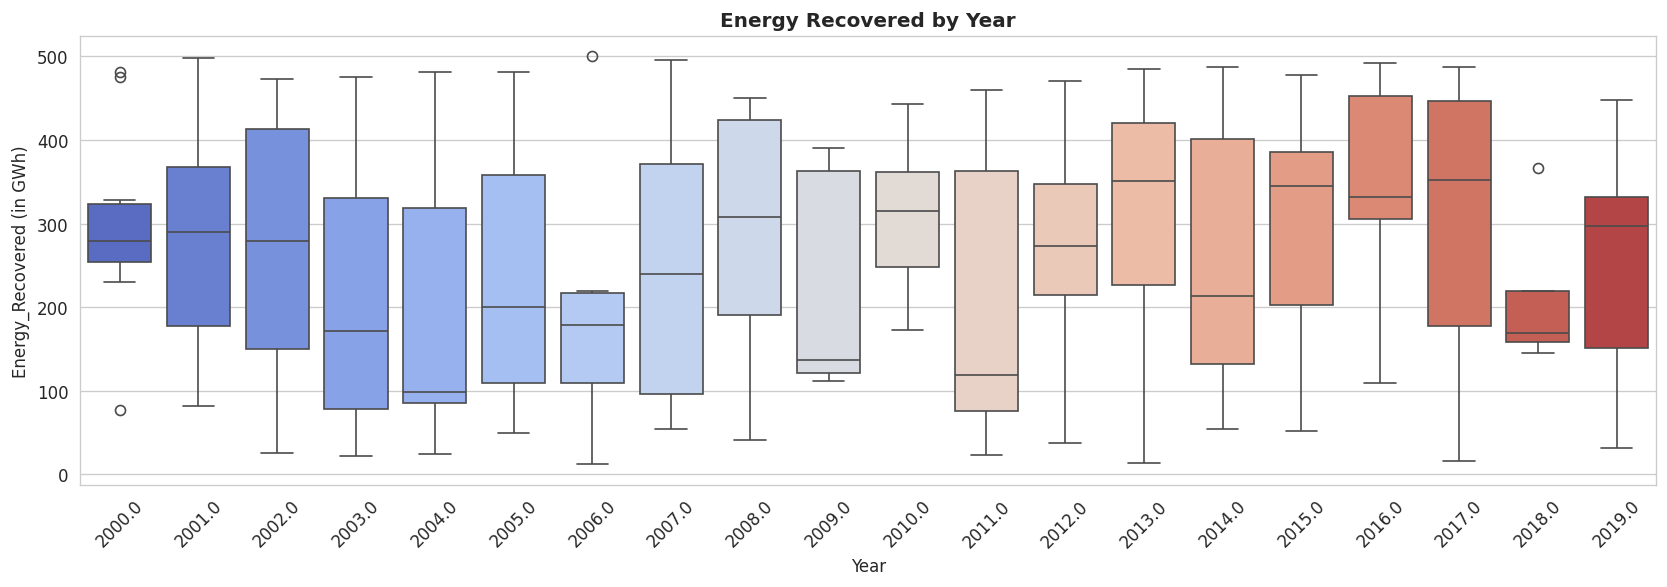

In [168]:
#  Box Plot: Energy Recovered by Year (grouped)
plt.figure(figsize=(14, 5))
sns.boxplot(data=df_orig, x='Year', y='Energy_Recovered (in GWh)', palette='coolwarm')
plt.title("Energy Recovered by Year", fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## STEP 3 — FEATURE ENGINEERING

In [169]:
#  3.1 Yearly Trend Features
# Work on df_orig (has 'Year' column intact)
yearly_trends = df_orig.groupby('Year').agg(
    Avg_Air_Pollution   = ('Air_Pollution_Index',              'mean'),
    Avg_Water_Pollution = ('Water_Pollution_Index',            'mean'),
    Avg_Soil_Pollution  = ('Soil_Pollution_Index',             'mean'),
    Total_CO2           = ('CO2_Emissions (in MT)',            'sum'),
    Total_Energy_Rec    = ('Energy_Recovered (in GWh)',        'sum'),
    Avg_Renewable       = ('Renewable_Energy (%)',             'mean'),
    Total_Industrial_W  = ('Industrial_Waste (in tons)',       'sum'),
    Avg_GDP             = ('GDP_Per_Capita (in USD)',          'mean'),
).reset_index()

print("\n--- Yearly Trend Summary ---")
print(yearly_trends.to_string(index=False))


--- Yearly Trend Summary ---
  Year  Avg_Air_Pollution  Avg_Water_Pollution  Avg_Soil_Pollution  Total_CO2  Total_Energy_Rec  Avg_Renewable  Total_Industrial_W      Avg_GDP
2000.0         197.796000           118.513000           69.283000     277.32           2968.89      20.813000           409420.43 41918.539000
2001.0         137.964444            83.933333           71.340000     164.70           2599.90      24.892222           480702.20 41467.384444
2002.0         174.661538           123.617692           75.344615     349.27           3376.76      27.226923           615358.67 40617.903846
2003.0         203.103000           133.080000          100.687000     282.70           2081.39      27.470000           671125.75 33669.050000
2004.0         171.120909           120.719091           69.959091     205.05           2051.04      31.131818           483723.78 35126.090909
2005.0         179.756000           108.245333           72.922000     380.03           3611.23      25.50

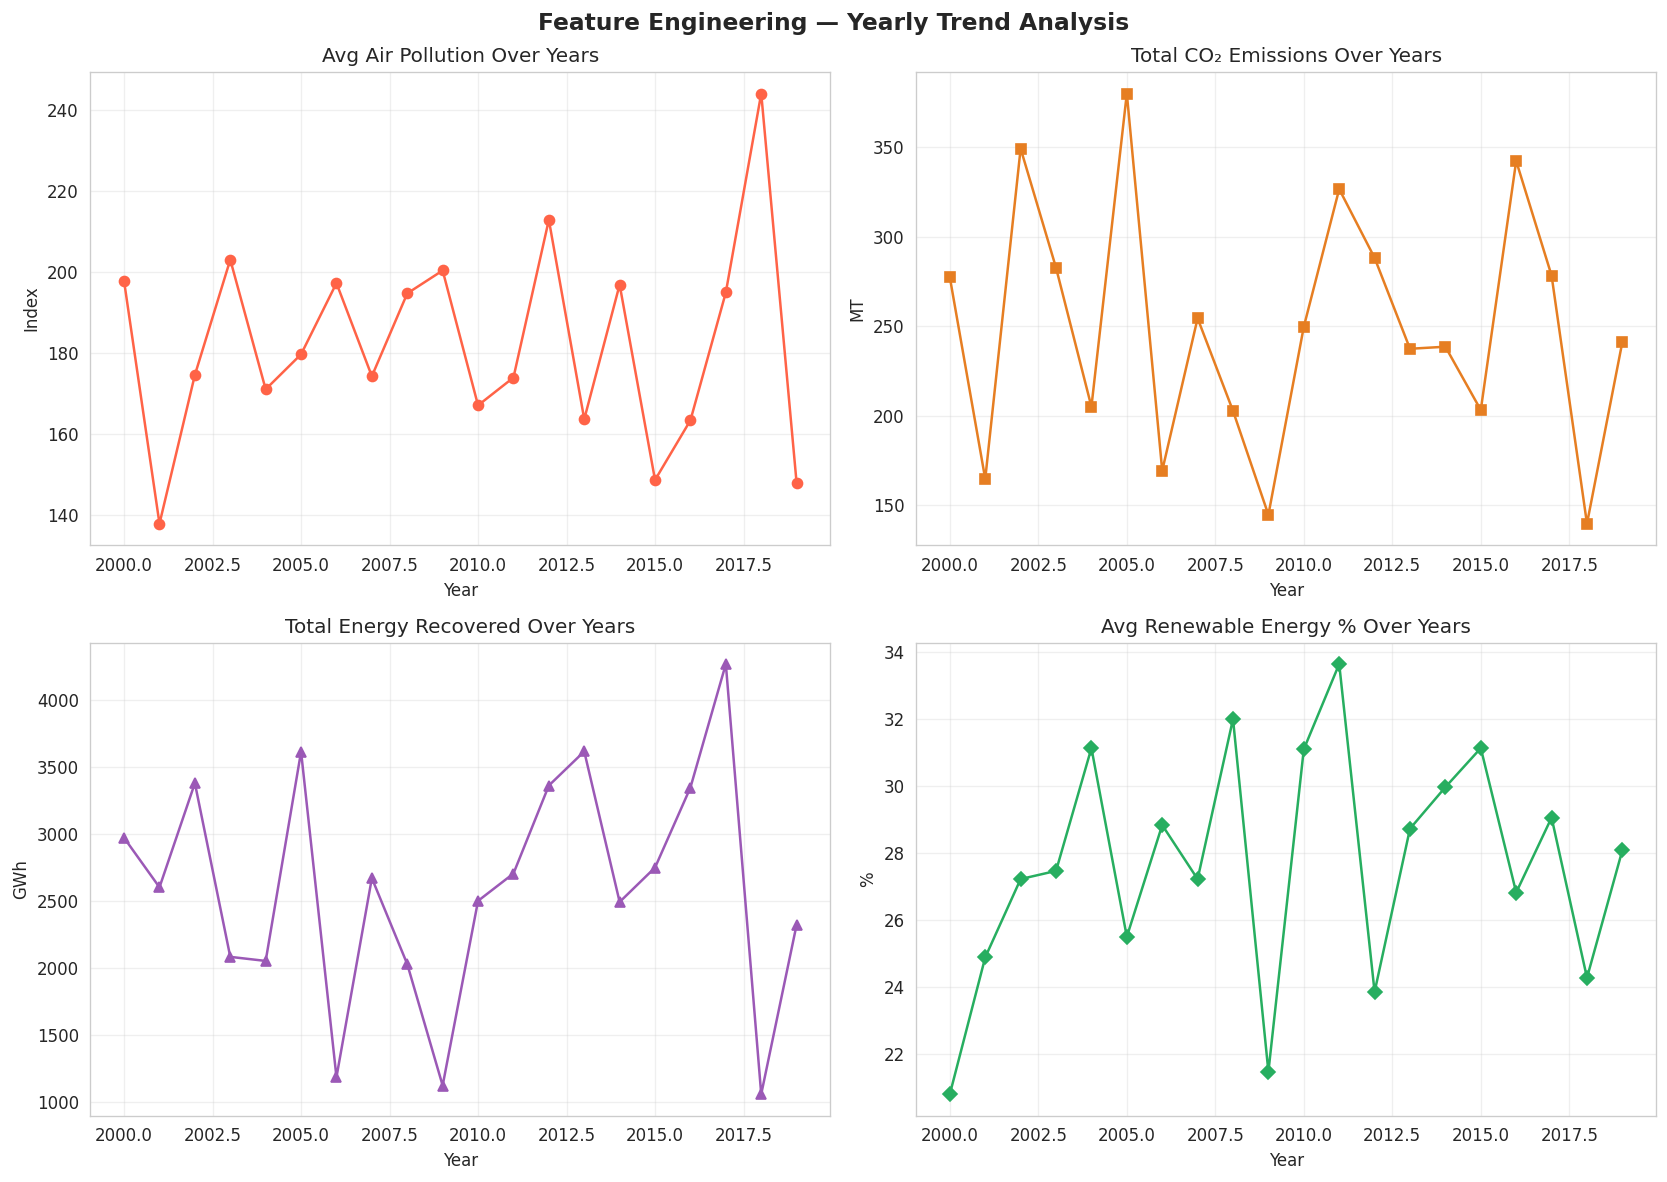

In [170]:
# Plot yearly trend summary
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Feature Engineering — Yearly Trend Analysis", fontsize=14, fontweight='bold')

axes[0,0].plot(yearly_trends['Year'], yearly_trends['Avg_Air_Pollution'], color='tomato', marker='o')
axes[0,0].set_title("Avg Air Pollution Over Years"); axes[0,0].set_ylabel("Index"); axes[0,0].grid(alpha=0.3)

axes[0,1].plot(yearly_trends['Year'], yearly_trends['Total_CO2'], color='#e67e22', marker='s')
axes[0,1].set_title("Total CO₂ Emissions Over Years"); axes[0,1].set_ylabel("MT"); axes[0,1].grid(alpha=0.3)

axes[1,0].plot(yearly_trends['Year'], yearly_trends['Total_Energy_Rec'], color='#9b59b6', marker='^')
axes[1,0].set_title("Total Energy Recovered Over Years"); axes[1,0].set_ylabel("GWh"); axes[1,0].grid(alpha=0.3)

axes[1,1].plot(yearly_trends['Year'], yearly_trends['Avg_Renewable'], color='#27ae60', marker='D')
axes[1,1].set_title("Avg Renewable Energy % Over Years"); axes[1,1].set_ylabel("%"); axes[1,1].grid(alpha=0.3)

for ax in axes.flatten():
    ax.set_xlabel("Year")
plt.tight_layout()
plt.show()

In [171]:
#  3.2 Energy Consumption per Capita
# Already exists as a column — verify, enrich, and bin it
print("\n--- Energy Consumption Per Capita Stats ---")
print(df_orig['Energy_Consumption_Per_Capita (in MWh)'].describe().round(2))

# Categorize into Low / Medium / High
bins   = [0, 5, 12, np.inf]
labels = ['Low (<5 MWh)', 'Medium (5–12 MWh)', 'High (>12 MWh)']
df_orig['Energy_Category'] = pd.cut(df_orig['Energy_Consumption_Per_Capita (in MWh)'],
                                     bins=bins, labels=labels)

print("\n--- Energy Consumption Category Distribution ---")
print(df_orig['Energy_Category'].value_counts())



--- Energy Consumption Per Capita Stats ---
count    200.00
mean       9.44
std        5.58
min        0.53
25%        4.58
50%        9.22
75%       14.00
max       19.98
Name: Energy_Consumption_Per_Capita (in MWh), dtype: float64

--- Energy Consumption Category Distribution ---
Energy_Category
High (>12 MWh)       71
Medium (5–12 MWh)    69
Low (<5 MWh)         60
Name: count, dtype: int64


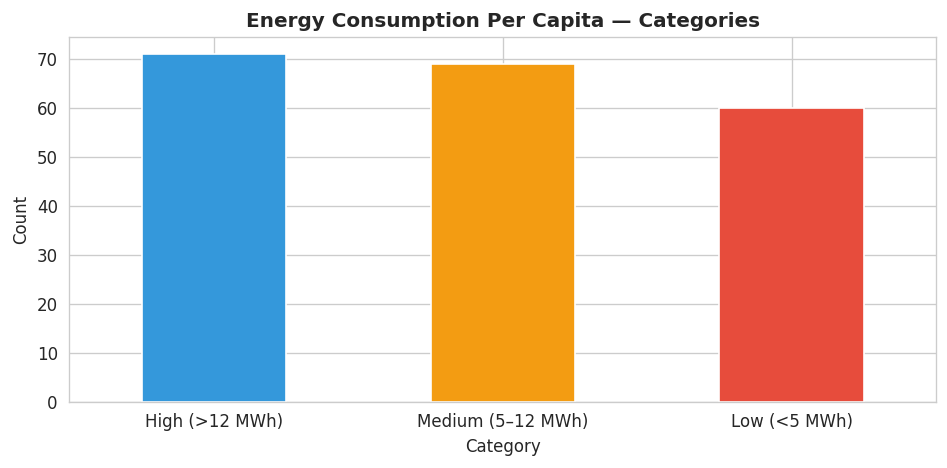

In [172]:
# Bar chart of categories
plt.figure(figsize=(8, 4))
df_orig['Energy_Category'].value_counts().plot(kind='bar', color=['#3498db','#f39c12','#e74c3c'], edgecolor='white')
plt.title("Energy Consumption Per Capita — Categories", fontweight='bold')
plt.xlabel("Category"); plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

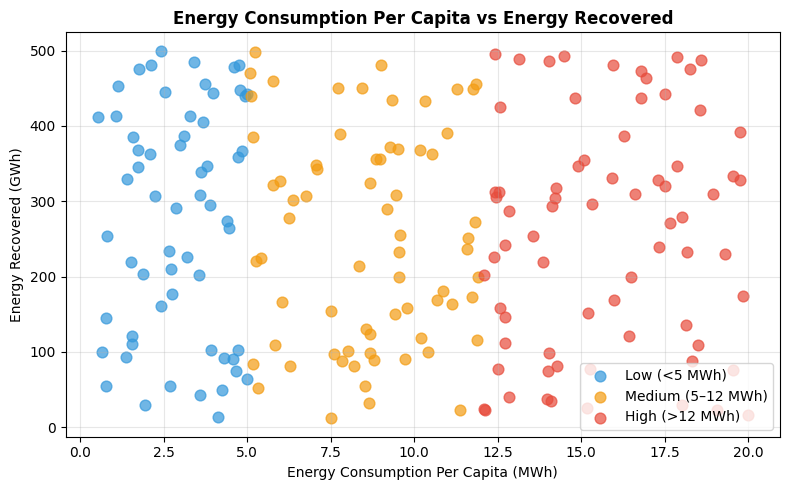

In [23]:
# Scatter: Energy per Capita vs Energy Recovered
plt.figure(figsize=(8, 5))
colors_map = {'Low (<5 MWh)': '#3498db', 'Medium (5–12 MWh)': '#f39c12', 'High (>12 MWh)': '#e74c3c'}
for cat, grp in df_orig.groupby('Energy_Category'):
    plt.scatter(grp['Energy_Consumption_Per_Capita (in MWh)'],
                grp['Energy_Recovered (in GWh)'],
                label=cat, alpha=0.7, s=60, color=colors_map[cat])
plt.title("Energy Consumption Per Capita vs Energy Recovered", fontweight='bold')
plt.xlabel("Energy Consumption Per Capita (MWh)")
plt.ylabel("Energy Recovered (GWh)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#PHASE 2: PREDICTIVE MODELING

In [173]:
#  IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings('ignore')

In [174]:
#  COLOUR PALETTE
C1, C2, C3 = '#3498db', '#e74c3c', '#2ecc71'
sns.set_style("whitegrid")

In [87]:
from google.colab import files
uploaded = files.upload()          # upload Global_Pollution_Analysis.csv


Saving Global_Pollution_Analysis.csv to Global_Pollution_Analysis (1).csv


In [88]:
df = pd.read_csv('Global_Pollution_Analysis.csv')


In [98]:
df = pd.read_csv('/content/Global_Pollution_Analysis.csv')


In [175]:
# Median imputation
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])

print("Dataset loaded & imputed  →  shape:", df.shape)
print(df.head(3))

Dataset loaded & imputed  →  shape: (200, 36)
     Country  Air_Pollution_Index  Water_Pollution_Index  \
0    Hungary               272.70                 124.27   
1  Singapore                86.72                  60.34   
2    Romania                91.59                  83.36   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0                 51.95                    94802.83   
1                117.22                    56283.92   
2                121.72                    56256.02   

   Energy_Recovered (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                     158.14                   5.30                 41.11   
1                     498.04                   6.34                 36.44   
2                     489.51                  49.69                  9.38   

   Plastic_Waste_Produced (in tons)  Energy_Consumption_Per_Capita (in MWh)  \
0                          37078.88                                   12.56   
1                        

## STEP 4 — LINEAR REGRESSION  (Predict Energy_Recovered)

In [176]:
print("\n" + "=" * 60)
print("STEP 4 — LINEAR REGRESSION: Predicting Energy Recovery")
print("=" * 60)


STEP 4 — LINEAR REGRESSION: Predicting Energy Recovery


In [177]:
#  4.1  Feature Selection
LR_FEATURES = [
    'Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'CO2_Emissions (in MT)',
    'Industrial_Waste (in tons)',
    'Renewable_Energy (%)',
    'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)',
    'Population (in millions)',
    'GDP_Per_Capita (in USD)',
]
TARGET_LR = 'Energy_Recovered (in GWh)'

X_lr = df[LR_FEATURES]
y_lr = df[TARGET_LR]


In [178]:
# Scale features
scaler_lr = StandardScaler()
X_lr_scaled = scaler_lr.fit_transform(X_lr)



In [179]:
#  4.2  Train / Test Split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr_scaled, y_lr, test_size=0.2, random_state=42
)
print(f"\nTrain size: {X_train_lr.shape[0]}  |  Test size: {X_test_lr.shape[0]}")



Train size: 160  |  Test size: 40


In [180]:
#  4.3  Train Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_lr, y_train_lr)

LinearRegression()

In [181]:
#  4.4  Predictions & Evaluation
y_pred_lr = lin_reg.predict(X_test_lr)

r2  = r2_score(y_test_lr, y_pred_lr)
mse = mean_squared_error(y_test_lr, y_pred_lr)
mae = mean_absolute_error(y_test_lr, y_pred_lr)
rmse = np.sqrt(mse)

cv_r2 = cross_val_score(LinearRegression(), X_lr_scaled, y_lr, cv=5, scoring='r2').mean()

print("\n--- Linear Regression Evaluation ---")
print(f"  R²       : {r2:.4f}")
print(f"  CV R²    : {cv_r2:.4f}  (5-fold)")
print(f"  MSE      : {mse:.4f}")
print(f"  RMSE     : {rmse:.4f}")
print(f"  MAE      : {mae:.4f}")



--- Linear Regression Evaluation ---
  R²       : -0.1082
  CV R²    : -0.1472  (5-fold)
  MSE      : 26799.6508
  RMSE     : 163.7060
  MAE      : 145.1878


In [182]:
#  4.5  Feature Coefficients
coef_df = pd.DataFrame({
    'Feature': LR_FEATURES,
    'Coefficient': lin_reg.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print("\n--- Feature Coefficients ---")
print(coef_df.to_string(index=False))



--- Feature Coefficients ---
                               Feature  Coefficient
            Industrial_Waste (in tons)   -20.134791
      Plastic_Waste_Produced (in tons)   -17.909984
              Population (in millions)   -16.603636
Energy_Consumption_Per_Capita (in MWh)   -10.227137
                   Air_Pollution_Index    -9.335047
               GDP_Per_Capita (in USD)     6.593481
                  Soil_Pollution_Index     4.372201
                 Water_Pollution_Index     4.028161
                 CO2_Emissions (in MT)    -3.992651
                  Renewable_Energy (%)    -3.293986


In [183]:
#  4.6  Visualisations
fig = plt.figure(figsize=(18, 14))
fig.suptitle("Step 4 — Linear Regression: Energy Recovery Prediction",
             fontsize=15, fontweight='bold', y=1.01)
gs = gridspec.GridSpec(2, 3, figure=fig, hspace=0.45, wspace=0.35)


<Figure size 2160x1680 with 0 Axes>

In [184]:
# ── CELL 3: Feature Selection & Scaling ──────────────────────
LR_FEATURES = [
    'Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'CO2_Emissions (in MT)',
    'Industrial_Waste (in tons)',
    'Renewable_Energy (%)',
    'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)',
    'Population (in millions)',
    'GDP_Per_Capita (in USD)',
]
TARGET = 'Energy_Recovered (in GWh)'

X = df[LR_FEATURES].copy()
y = df[TARGET].copy()

scaler_lr = StandardScaler()
X_scaled = scaler_lr.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print(f"\nTrain: {X_train.shape[0]} samples | Test: {X_test.shape[0]} samples")

# ── CELL 4: Train Linear Regression ──────────────────────────
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

r2   = r2_score(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
cv_r2 = cross_val_score(LinearRegression(), X_scaled, y, cv=5, scoring='r2').mean()
residuals = y_test.values - y_pred

print("=" * 45)
print("  LINEAR REGRESSION — EVALUATION METRICS")
print("=" * 45)
print(f"  R²          : {r2:.4f}")
print(f"  CV R² (5-fold): {cv_r2:.4f}")
print(f"  MSE         : {mse:.4f}")
print(f"  RMSE        : {rmse:.4f}")
print(f"  MAE         : {mae:.4f}")
print("=" * 45)



Train: 160 samples | Test: 40 samples
  LINEAR REGRESSION — EVALUATION METRICS
  R²          : -0.1082
  CV R² (5-fold): -0.1472
  MSE         : 26799.6508
  RMSE        : 163.7060
  MAE         : 145.1878


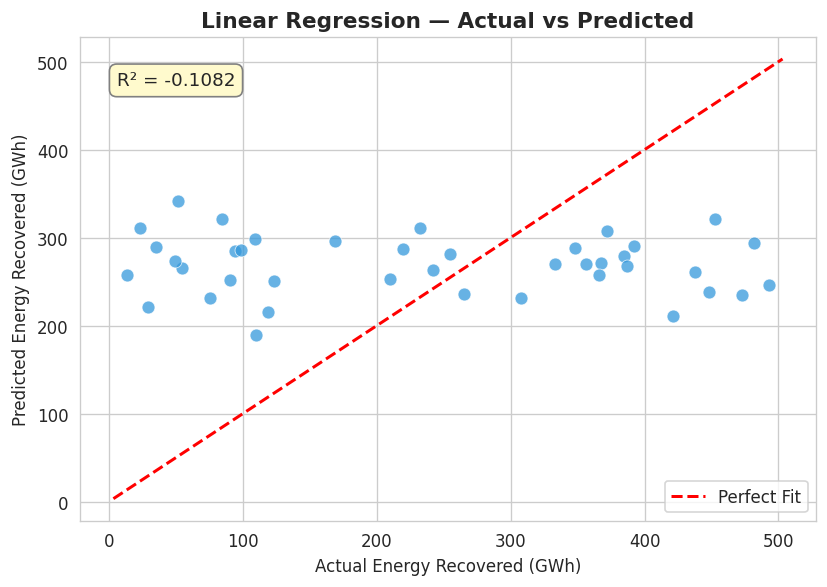

In [185]:
# --- Plot 1: Actual vs Predicted ---
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(y_test, y_pred, color='#3498db', alpha=0.75, s=60,
           edgecolors='white', linewidth=0.5)
lims = [min(y_test.min(), y_pred.min())-10, max(y_test.max(), y_pred.max())+10]
ax.plot(lims, lims, 'r--', linewidth=1.8, label='Perfect Fit')
ax.set_title("Linear Regression — Actual vs Predicted", fontsize=13, fontweight='bold')
ax.set_xlabel("Actual Energy Recovered (GWh)")
ax.set_ylabel("Predicted Energy Recovered (GWh)")
ax.text(0.05, 0.90, f'R² = {r2:.4f}', transform=ax.transAxes, fontsize=11,
        bbox=dict(boxstyle='round,pad=0.4', facecolor='#fffacd', edgecolor='gray'))
ax.legend()
plt.tight_layout()
plt.show()


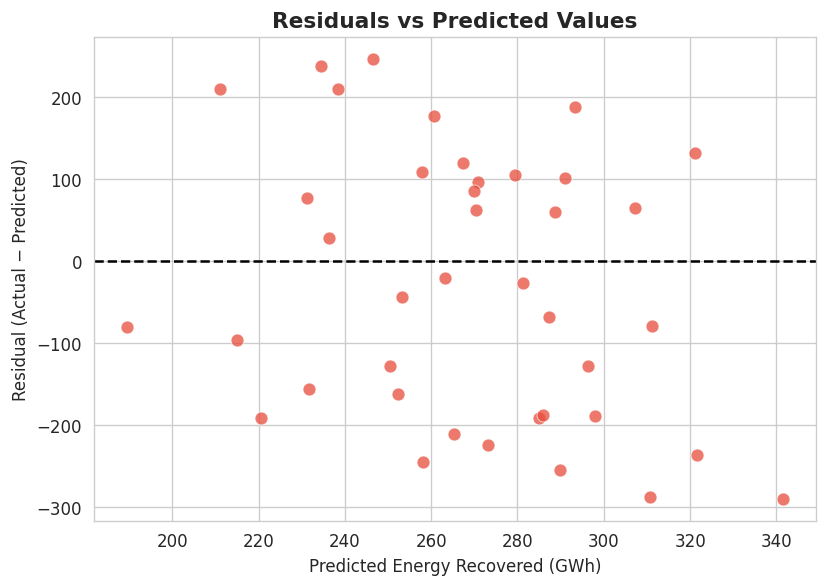

In [186]:
# --- Plot 2: Residuals vs Predicted ---
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(y_pred, residuals, color='#e74c3c', alpha=0.75, s=60,
           edgecolors='white', linewidth=0.5)
ax.axhline(0, color='black', linewidth=1.5, linestyle='--')
ax.set_title("Residuals vs Predicted Values", fontsize=13, fontweight='bold')
ax.set_xlabel("Predicted Energy Recovered (GWh)")
ax.set_ylabel("Residual (Actual − Predicted)")
plt.tight_layout()
plt.show()


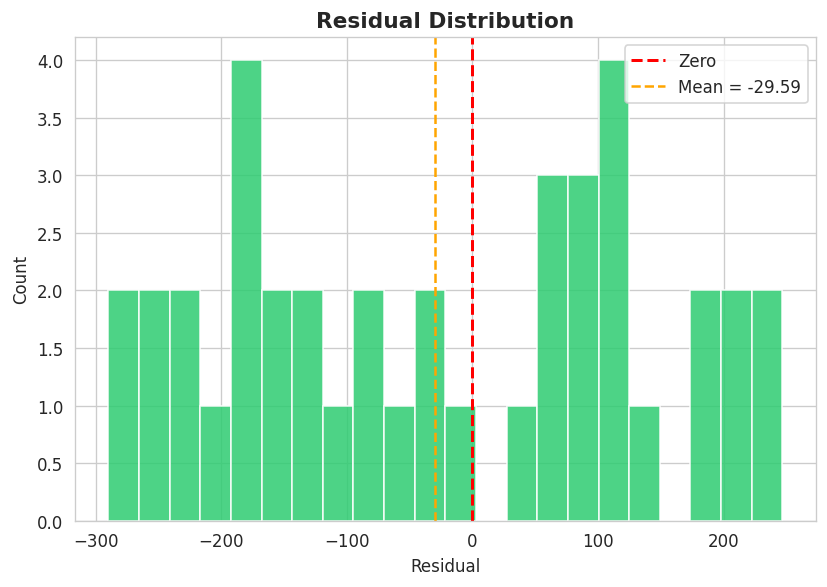

In [187]:
# --- Plot 3: Residual Distribution ---
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(residuals, bins=22, color='#2ecc71', edgecolor='white', alpha=0.85)
ax.axvline(0, color='red', linestyle='--', linewidth=1.8, label='Zero')
ax.axvline(np.mean(residuals), color='orange', linestyle='--',
           linewidth=1.5, label=f'Mean = {np.mean(residuals):.2f}')
ax.set_title("Residual Distribution", fontsize=13, fontweight='bold')
ax.set_xlabel("Residual"); ax.set_ylabel("Count")
ax.legend()
plt.tight_layout()
plt.show()


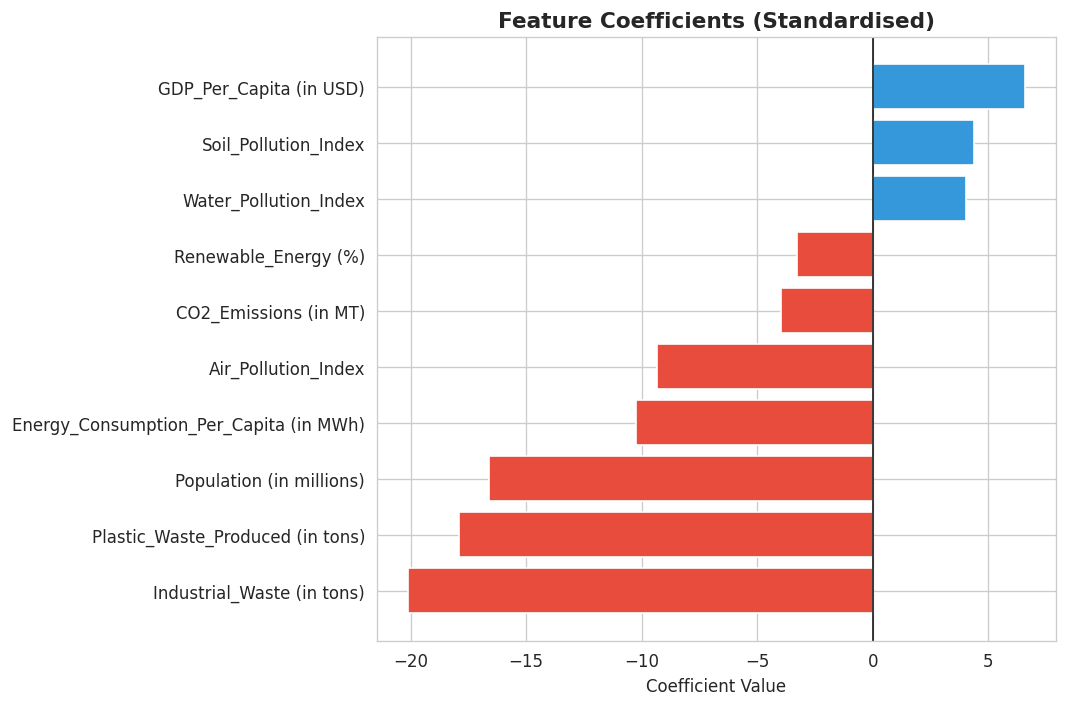

In [188]:
# --- Plot 4: Feature Coefficients ---
coef_df = pd.DataFrame({
    'Feature': LR_FEATURES,
    'Coefficient': lin_reg.coef_
}).sort_values('Coefficient')

fig, ax = plt.subplots(figsize=(9, 6))
colors = ['#e74c3c' if v < 0 else '#3498db' for v in coef_df['Coefficient']]
ax.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, edgecolor='white')
ax.axvline(0, color='black', linewidth=0.9)
ax.set_title("Feature Coefficients (Standardised)", fontsize=13, fontweight='bold')
ax.set_xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


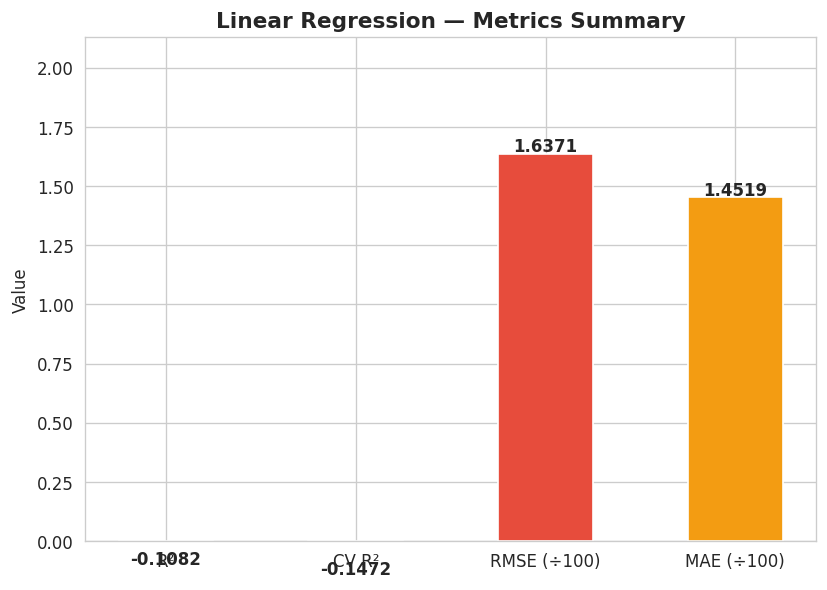

In [189]:
# --- Plot 5: Evaluation Metrics Summary ---
fig, ax = plt.subplots(figsize=(7, 5))
metric_names  = ['R²', 'CV R²', 'RMSE (÷100)', 'MAE (÷100)']
metric_values = [r2, cv_r2, rmse/100, mae/100]
bar_colors    = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']
bars = ax.bar(metric_names, metric_values, color=bar_colors, edgecolor='white', width=0.5)
for bar, val in zip(bars, metric_values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.008,
            f'{val:.4f}', ha='center', fontsize=10, fontweight='bold')
ax.set_ylim(0, max(metric_values) * 1.3)
ax.set_title("Linear Regression — Metrics Summary", fontsize=13, fontweight='bold')
ax.set_ylabel("Value")
plt.tight_layout()
plt.show()

## STEP 5 — LOGISTIC REGRESSION  (Classify Pollution Severity)

In [190]:
print("\n" + "=" * 60)
print("STEP 5 — LOGISTIC REGRESSION: Pollution Level Classification")
print("=" * 60)


STEP 5 — LOGISTIC REGRESSION: Pollution Level Classification


In [191]:
#  5.1  Create Target: Pollution Severity
# Composite pollution score = average of 3 normalised indices
norm_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
df_cls = df.copy()
norm_vals = MinMaxScaler().fit_transform(df_cls[norm_cols])
df_cls['Pollution_Score'] = norm_vals.mean(axis=1)

In [192]:
# Bin into Low / Medium / High using tertile cut
bins_cls   = [0, 0.33, 0.66, 1.0]
labels_cls = ['Low', 'Medium', 'High']
df_cls['Pollution_Level'] = pd.cut(df_cls['Pollution_Score'],
                                    bins=bins_cls, labels=labels_cls, include_lowest=True)

print("\n--- Pollution Level Distribution ---")
print(df_cls['Pollution_Level'].value_counts())



--- Pollution Level Distribution ---
Pollution_Level
Medium    138
High       35
Low        27
Name: count, dtype: int64


In [193]:
#  5.2  Feature Selection
LOG_FEATURES = [
    'Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'CO2_Emissions (in MT)',
    'Industrial_Waste (in tons)',
    'Renewable_Energy (%)',
    'GDP_Per_Capita (in USD)',
    'Population (in millions)',
]

X_cls = df_cls[LOG_FEATURES]
y_cls = df_cls['Pollution_Level']


In [194]:
# Scale
scaler_cls = StandardScaler()
X_cls_scaled = scaler_cls.fit_transform(X_cls)


In [195]:
#  5.3  Train / Test Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls_scaled, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)
print(f"\nTrain size: {X_train_c.shape[0]}  |  Test size: {X_test_c.shape[0]}")



Train size: 160  |  Test size: 40


In [196]:
#  5.4  Train Model
log_reg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
log_reg.fit(X_train_c, y_train_c)


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [197]:
#  5.5  Predictions & Evaluation
y_pred_c = log_reg.predict(X_test_c)

acc  = accuracy_score(y_test_c, y_pred_c)
prec = precision_score(y_test_c, y_pred_c, average='weighted')
rec  = recall_score(y_test_c, y_pred_c, average='weighted')
f1   = f1_score(y_test_c, y_pred_c, average='weighted')
cv_acc = cross_val_score(
    LogisticRegression(max_iter=1000, random_state=42),
    X_cls_scaled, y_cls, cv=5, scoring='accuracy'
).mean()

print("\n--- Logistic Regression Evaluation ---")
print(f"  Accuracy        : {acc:.4f}")
print(f"  CV Accuracy     : {cv_acc:.4f}  (5-fold)")
print(f"  Precision       : {prec:.4f}")
print(f"  Recall          : {rec:.4f}")
print(f"  F1-Score        : {f1:.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test_c, y_pred_c, target_names=labels_cls))



--- Logistic Regression Evaluation ---
  Accuracy        : 0.9250
  CV Accuracy     : 0.9400  (5-fold)
  Precision       : 0.9323
  Recall          : 0.9250
  F1-Score        : 0.9197

--- Classification Report ---
              precision    recall  f1-score   support

         Low       1.00      0.86      0.92         7
      Medium       1.00      0.60      0.75         5
        High       0.90      1.00      0.95        28

    accuracy                           0.93        40
   macro avg       0.97      0.82      0.87        40
weighted avg       0.93      0.93      0.92        40



In [198]:
# ── CELL 6: Create Target Variable ───────────────────────────
df_cls = df.copy()

# Composite pollution score = mean of 3 normalised indices
norm_vals = MinMaxScaler().fit_transform(
    df_cls[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index']]
)
df_cls['Pollution_Score'] = norm_vals.mean(axis=1)

# Bin into Low / Medium / High (tertiles)
df_cls['Pollution_Level'] = pd.cut(
    df_cls['Pollution_Score'],
    bins=[0, 0.33, 0.66, 1.0],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

print("--- Pollution Level Distribution ---")
print(df_cls['Pollution_Level'].value_counts().to_string())


--- Pollution Level Distribution ---
Pollution_Level
Medium    138
High       35
Low        27


In [199]:
# ── CELL 7: Train Logistic Regression ────────────────────────
LOG_FEATURES = [
    'Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'CO2_Emissions (in MT)',
    'Industrial_Waste (in tons)',
    'Renewable_Energy (%)',
    'GDP_Per_Capita (in USD)',
    'Population (in millions)',
]

X_c = StandardScaler().fit_transform(df_cls[LOG_FEATURES])
y_c = df_cls['Pollution_Level']

X_tr_c, X_te_c, y_tr_c, y_te_c = train_test_split(
    X_c, y_c, test_size=0.2, random_state=42, stratify=y_c
)

log_reg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
log_reg.fit(X_tr_c, y_tr_c)
y_pred_c = log_reg.predict(X_te_c)

acc    = accuracy_score(y_te_c, y_pred_c)
prec   = precision_score(y_te_c, y_pred_c, average='weighted')
rec    = recall_score(y_te_c, y_pred_c, average='weighted')
f1     = f1_score(y_te_c, y_pred_c, average='weighted')
cv_acc = cross_val_score(
    LogisticRegression(max_iter=1000), X_c, y_c, cv=5, scoring='accuracy'
).mean()

print("\n" + "=" * 47)
print("  LOGISTIC REGRESSION — EVALUATION METRICS")
print("=" * 47)
print(f"  Accuracy          : {acc:.4f}")
print(f"  CV Accuracy (5-fold): {cv_acc:.4f}")
print(f"  Precision (weighted): {prec:.4f}")
print(f"  Recall (weighted)   : {rec:.4f}")
print(f"  F1-Score (weighted) : {f1:.4f}")
print("=" * 47)
print("\n--- Classification Report ---")
print(classification_report(y_te_c, y_pred_c, target_names=['High','Low','Medium']))




  LOGISTIC REGRESSION — EVALUATION METRICS
  Accuracy          : 0.9250
  CV Accuracy (5-fold): 0.9400
  Precision (weighted): 0.9323
  Recall (weighted)   : 0.9250
  F1-Score (weighted) : 0.9197

--- Classification Report ---
              precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
         Low       1.00      0.60      0.75         5
      Medium       0.90      1.00      0.95        28

    accuracy                           0.93        40
   macro avg       0.97      0.82      0.87        40
weighted avg       0.93      0.93      0.92        40



<Figure size 2160x1680 with 0 Axes>

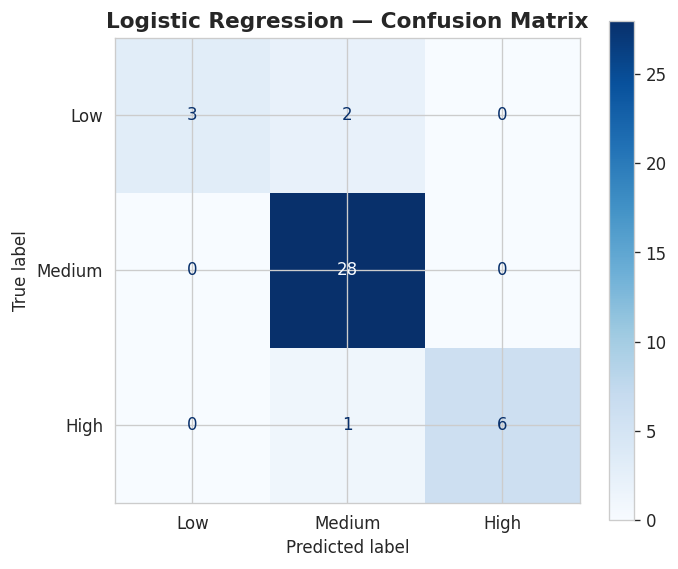

In [200]:
#  5.6  Visualisations
fig2 = plt.figure(figsize=(18, 14))
fig2.suptitle("Step 5 — Logistic Regression: Pollution Level Classification",
              fontsize=15, fontweight='bold', y=1.01)
gs2 = gridspec.GridSpec(2, 3, figure=fig2, hspace=0.45, wspace=0.38)

# --- Plot 1: Confusion Matrix ---
fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_te_c, y_pred_c, labels=['Low','Medium','High'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low','Medium','High'])
disp.plot(ax=ax, colorbar=True, cmap='Blues')
ax.set_title("Logistic Regression — Confusion Matrix", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


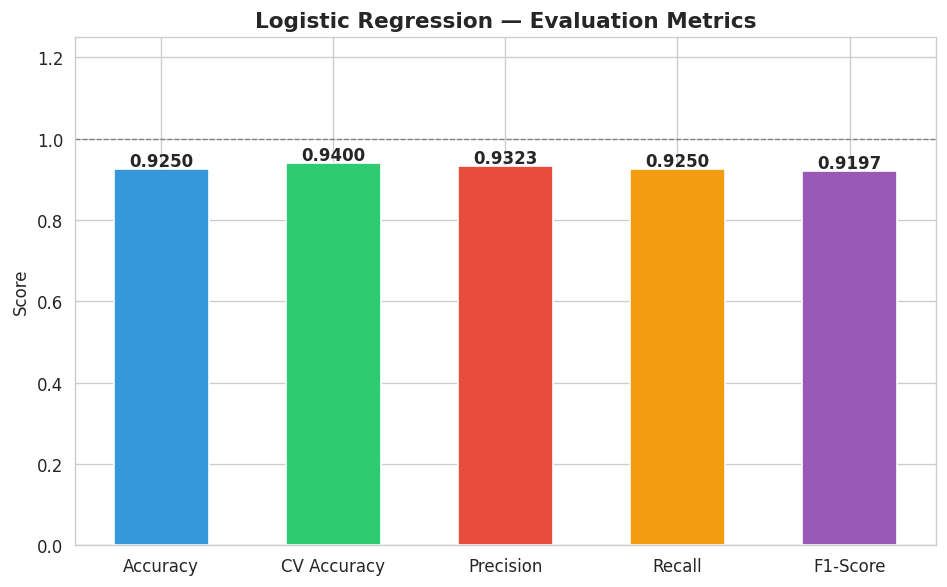

In [201]:
# --- Plot 2: Metrics Bar Chart ---
fig, ax = plt.subplots(figsize=(8, 5))
m_names  = ['Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1-Score']
m_values = [acc, cv_acc, prec, rec, f1]
m_colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']
bars = ax.bar(m_names, m_values, color=m_colors, edgecolor='white', width=0.55)
for bar, val in zip(bars, m_values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.008,
            f'{val:.4f}', ha='center', fontsize=10, fontweight='bold')
ax.set_ylim(0, 1.25)
ax.axhline(1.0, color='grey', linestyle='--', linewidth=0.8)
ax.set_title("Logistic Regression — Evaluation Metrics", fontsize=13, fontweight='bold')
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()

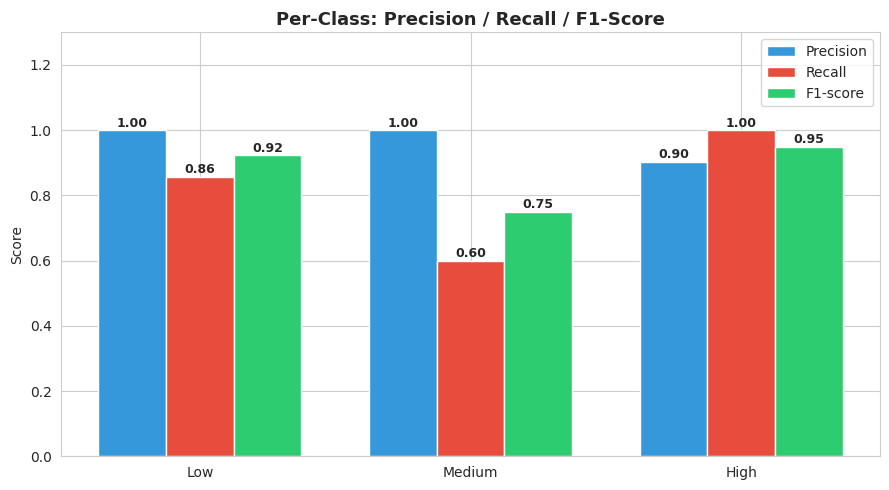

In [127]:
# --- Plot 3: Per-Class Precision / Recall / F1 ---
report = classification_report(y_te_c, y_pred_c,
    target_names=['Low','Medium','High'], output_dict=True)
classes_list = ['Low','Medium','High']
x = np.arange(3); w = 0.25

fig, ax = plt.subplots(figsize=(9, 5))
for i, (metric, color) in enumerate(zip(['precision','recall','f1-score'],
                                         ['#3498db','#e74c3c','#2ecc71'])):
    vals = [report[cls][metric] for cls in classes_list]
    bars = ax.bar(x + i*w, vals, width=w, color=color,
                  edgecolor='white', label=metric.capitalize())
    for bar, v in zip(bars, vals):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.01,
                f'{v:.2f}', ha='center', fontsize=9, fontweight='bold')
ax.set_xticks(x + w)
ax.set_xticklabels(['Low','Medium','High'])
ax.set_ylim(0, 1.3)
ax.set_title("Per-Class: Precision / Recall / F1-Score", fontsize=13, fontweight='bold')
ax.set_ylabel("Score")
ax.legend()
plt.tight_layout()
plt.show()


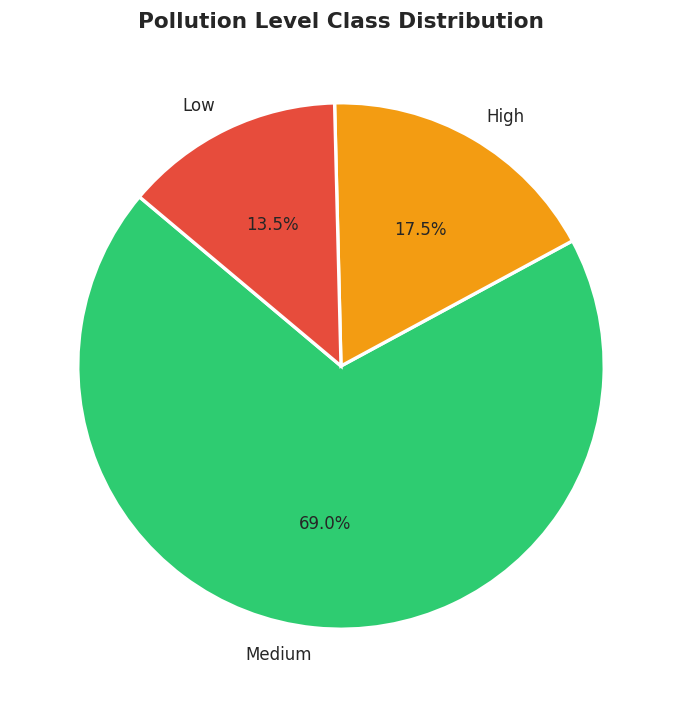

In [202]:
# --- Plot 4: Class Distribution Pie ---
fig, ax = plt.subplots(figsize=(6, 6))
counts = df_cls['Pollution_Level'].value_counts()
ax.pie(counts.values,
       labels=counts.index,
       autopct='%1.1f%%',
       colors=['#2ecc71','#f39c12','#e74c3c'],
       startangle=140,
       wedgeprops={'edgecolor':'white','linewidth':2})
ax.set_title("Pollution Level Class Distribution", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

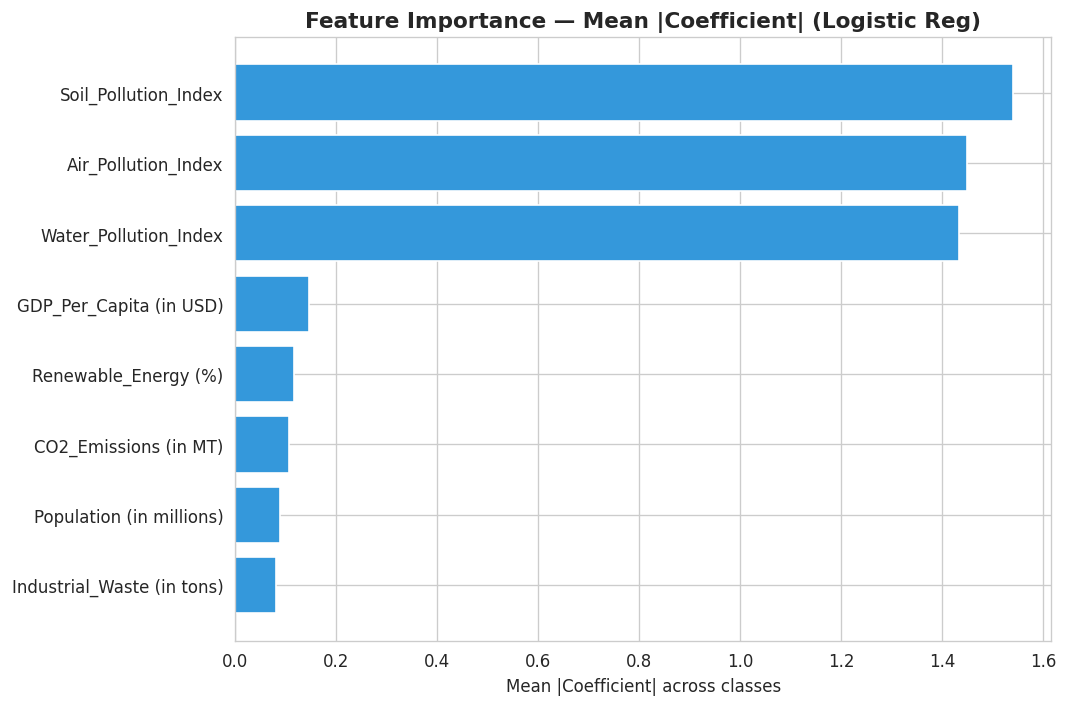

In [203]:
# --- Plot 5: Feature Importance (Mean |Coef| across classes) ---
coef_imp = pd.Series(
    np.abs(log_reg.coef_).mean(axis=0),
    index=LOG_FEATURES
).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(9, 6))
ax.barh(coef_imp.index, coef_imp.values, color='#3498db', edgecolor='white')
ax.set_title("Feature Importance — Mean |Coefficient| (Logistic Reg)",
             fontsize=13, fontweight='bold')
ax.set_xlabel("Mean |Coefficient| across classes")
plt.tight_layout()
plt.show()

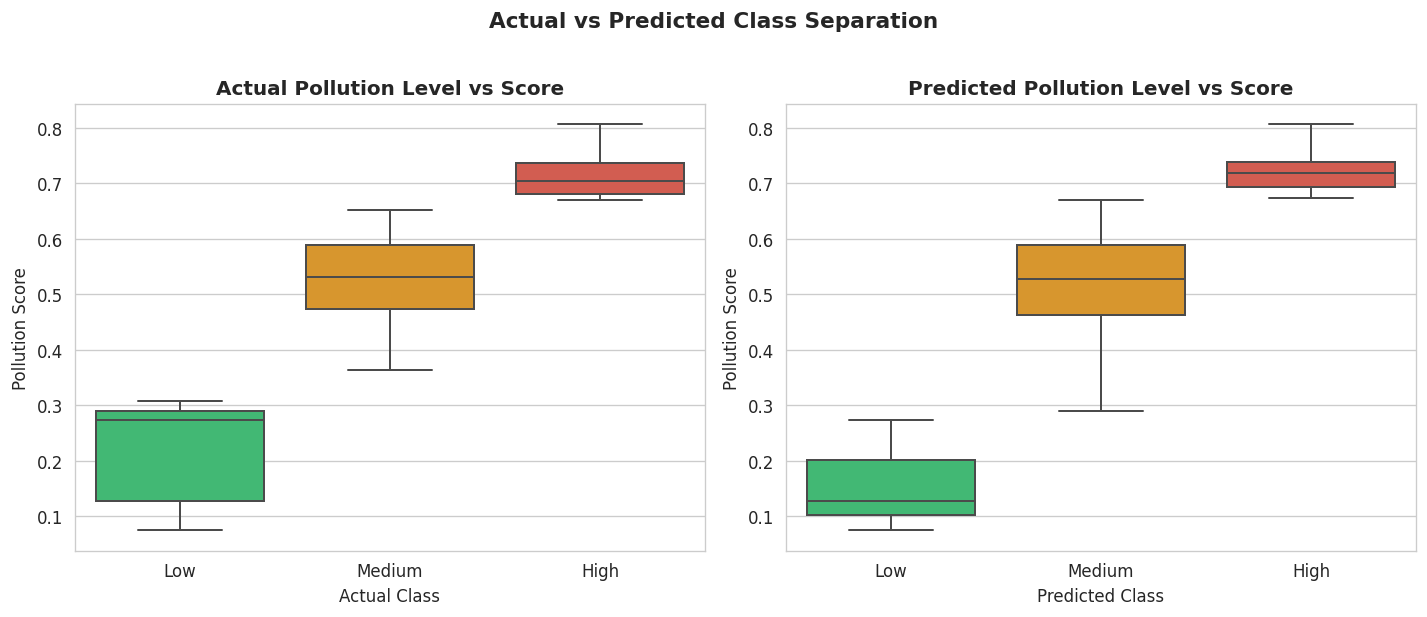

In [204]:
# --- Plot 6: Pollution Score by Predicted Class (Box) ---
df_te = df_cls.iloc[y_te_c.index].copy()
df_te['Predicted'] = y_pred_c

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
palette = {'Low':'#2ecc71','Medium':'#f39c12','High':'#e74c3c'}

sns.boxplot(data=df_te, x='Pollution_Level', y='Pollution_Score',
            order=['Low','Medium','High'], palette=palette, ax=axes[0], linewidth=1.2)
axes[0].set_title("Actual Pollution Level vs Score", fontweight='bold')
axes[0].set_xlabel("Actual Class"); axes[0].set_ylabel("Pollution Score")

sns.boxplot(data=df_te, x='Predicted', y='Pollution_Score',
            order=['Low','Medium','High'], palette=palette, ax=axes[1], linewidth=1.2)
axes[1].set_title("Predicted Pollution Level vs Score", fontweight='bold')
axes[1].set_xlabel("Predicted Class"); axes[1].set_ylabel("Pollution Score")

plt.suptitle("Actual vs Predicted Class Separation", fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [205]:
# Plot 5 — Pollution Score Distribution by Class
ax_box = fig2.add_subplot(gs2[1, 2])
order = ['Low', 'Medium', 'High']
palette_box = {'Low': C3, 'Medium': '#f39c12', 'High': C2}
sns.boxplot(data=df_cls, x='Pollution_Level', y='Pollution_Score',
            order=order, palette=palette_box, ax=ax_box,
            linewidth=1.2, flierprops={'marker': 'o', 'markersize': 4, 'alpha': 0.5})
ax_box.set_title("Pollution Score by Class", fontweight='bold')
ax_box.set_xlabel("Pollution Level")
ax_box.set_ylabel("Composite Pollution Score")

plt.tight_layout()
plt.show()

<Figure size 768x576 with 0 Axes>

In [206]:
#  Final Summary
print("\n" + "=" * 60)
print("PHASE 2 COMPLETE — MODEL SUMMARY")
print("=" * 60)
print(f"\n  LINEAR REGRESSION  (Energy Recovery Prediction)")
print(f"    R²   : {r2:.4f}  |  CV R²: {cv_r2:.4f}")
print(f"    RMSE : {rmse:.4f}  |  MAE  : {mae:.4f}")
print(f"\n  LOGISTIC REGRESSION  (Pollution Level Classification)")
print(f"    Accuracy  : {acc:.4f}  |  CV Acc: {cv_acc:.4f}")
print(f"    Precision : {prec:.4f}  |  Recall : {rec:.4f}  |  F1: {f1:.4f}")




PHASE 2 COMPLETE — MODEL SUMMARY

  LINEAR REGRESSION  (Energy Recovery Prediction)
    R²   : -0.1082  |  CV R²: -0.1472
    RMSE : 163.7060  |  MAE  : 145.1878

  LOGISTIC REGRESSION  (Pollution Level Classification)
    Accuracy  : 0.9250  |  CV Acc: 0.9400
    Precision : 0.9323  |  Recall : 0.9250  |  F1: 0.9197


#PHASE 3: REPORTING & INSIGHTS

In [131]:
# ── CELL 1: IMPORTS ──────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 120
print("✔ All libraries imported.")


✔ All libraries imported.


In [132]:
# ── CELL 2: LOAD DATA & REBUILD BOTH MODELS ──────────────────
df = pd.read_csv('/content/Global_Pollution_Analysis.csv')
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])
print(f"✔ Data loaded: {df.shape}")


✔ Data loaded: (200, 13)


In [133]:
# ---- Linear Regression ----
LR_FEATURES = [
    'Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index',
    'CO2_Emissions (in MT)','Industrial_Waste (in tons)',
    'Renewable_Energy (%)','Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)','Population (in millions)',
    'GDP_Per_Capita (in USD)',
]
TARGET = 'Energy_Recovered (in GWh)'
X_lr = StandardScaler().fit_transform(df[LR_FEATURES])
y_lr = df[TARGET]
X_tr_lr, X_te_lr, y_tr_lr, y_te_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)
lin_reg = LinearRegression().fit(X_tr_lr, y_tr_lr)
y_pred_lr = lin_reg.predict(X_te_lr)

r2    = r2_score(y_te_lr, y_pred_lr)
mse   = mean_squared_error(y_te_lr, y_pred_lr)
rmse  = np.sqrt(mse)
mae   = mean_absolute_error(y_te_lr, y_pred_lr)
cv_r2 = cross_val_score(LinearRegression(), X_lr, y_lr, cv=5, scoring='r2').mean()
residuals = y_te_lr.values - y_pred_lr




In [134]:
# ---- Logistic Regression ----
df_cls = df.copy()
nv = MinMaxScaler().fit_transform(df_cls[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index']])
df_cls['Pollution_Score'] = nv.mean(axis=1)
df_cls['Pollution_Level'] = pd.cut(df_cls['Pollution_Score'],
    bins=[0,0.33,0.66,1.0], labels=['Low','Medium','High'], include_lowest=True)

LOG_FEATURES = [
    'Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index',
    'CO2_Emissions (in MT)','Industrial_Waste (in tons)',
    'Renewable_Energy (%)','GDP_Per_Capita (in USD)','Population (in millions)',
]
X_cls = StandardScaler().fit_transform(df_cls[LOG_FEATURES])
y_cls = df_cls['Pollution_Level']
X_tr_c, X_te_c, y_tr_c, y_te_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)
log_reg = LogisticRegression(max_iter=1000, random_state=42).fit(X_tr_c, y_tr_c)
y_pred_c = log_reg.predict(X_te_c)

acc    = accuracy_score(y_te_c, y_pred_c)
prec   = precision_score(y_te_c, y_pred_c, average='weighted')
rec    = recall_score(y_te_c, y_pred_c, average='weighted')
f1     = f1_score(y_te_c, y_pred_c, average='weighted')
cv_acc = cross_val_score(LogisticRegression(max_iter=1000), X_cls, y_cls, cv=5, scoring='accuracy').mean()

print(f"✔ Linear Regression  → R²={r2:.4f}  RMSE={rmse:.2f}  MAE={mae:.2f}")
print(f"✔ Logistic Regression → Acc={acc:.4f}  F1={f1:.4f}")


✔ Linear Regression  → R²=-0.1082  RMSE=163.71  MAE=145.19
✔ Logistic Regression → Acc=0.9250  F1=0.9197


In [135]:
# ============================================================
# STEP 6 — MODEL EVALUATION & COMPARISON
# ============================================================
print("\n" + "="*55)
print("STEP 6 — MODEL EVALUATION & COMPARISON")
print("="*55)
print(f"""
  LINEAR REGRESSION         LOGISTIC REGRESSION
  ─────────────────         ───────────────────
  R²       : {r2:.4f}         Accuracy  : {acc:.4f}
  CV R²    : {cv_r2:.4f}         CV Acc    : {cv_acc:.4f}
  MSE      : {mse:.4f}        Precision : {prec:.4f}
  RMSE     : {rmse:.4f}        Recall    : {rec:.4f}
  MAE      : {mae:.4f}        F1-Score  : {f1:.4f}
""")
print("--- Classification Report (Logistic) ---")
print(classification_report(y_te_c, y_pred_c, target_names=['High','Low','Medium']))


STEP 6 — MODEL EVALUATION & COMPARISON

  LINEAR REGRESSION         LOGISTIC REGRESSION
  ─────────────────         ───────────────────
  R²       : -0.1082         Accuracy  : 0.9250
  CV R²    : -0.1472         CV Acc    : 0.9400
  MSE      : 26799.6508        Precision : 0.9323
  RMSE     : 163.7060        Recall    : 0.9250
  MAE      : 145.1878        F1-Score  : 0.9197

--- Classification Report (Logistic) ---
              precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
         Low       1.00      0.60      0.75         5
      Medium       0.90      1.00      0.95        28

    accuracy                           0.93        40
   macro avg       0.97      0.82      0.87        40
weighted avg       0.93      0.93      0.92        40



## STEP 6 — MODEL EVALUATION & COMPARISON

In [136]:
print("\n" + "="*55)
print("STEP 6 — MODEL EVALUATION & COMPARISON")
print("="*55)
print(f"""
  LINEAR REGRESSION         LOGISTIC REGRESSION
  ─────────────────         ───────────────────
  R²       : {r2:.4f}         Accuracy  : {acc:.4f}
  CV R²    : {cv_r2:.4f}         CV Acc    : {cv_acc:.4f}
  MSE      : {mse:.4f}        Precision : {prec:.4f}
  RMSE     : {rmse:.4f}        Recall    : {rec:.4f}
  MAE      : {mae:.4f}        F1-Score  : {f1:.4f}
""")
print("--- Classification Report (Logistic) ---")
print(classification_report(y_te_c, y_pred_c, target_names=['High','Low','Medium']))



STEP 6 — MODEL EVALUATION & COMPARISON

  LINEAR REGRESSION         LOGISTIC REGRESSION
  ─────────────────         ───────────────────
  R²       : -0.1082         Accuracy  : 0.9250
  CV R²    : -0.1472         CV Acc    : 0.9400
  MSE      : 26799.6508        Precision : 0.9323
  RMSE     : 163.7060        Recall    : 0.9250
  MAE      : 145.1878        F1-Score  : 0.9197

--- Classification Report (Logistic) ---
              precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
         Low       1.00      0.60      0.75         5
      Medium       0.90      1.00      0.95        28

    accuracy                           0.93        40
   macro avg       0.97      0.82      0.87        40
weighted avg       0.93      0.93      0.92        40



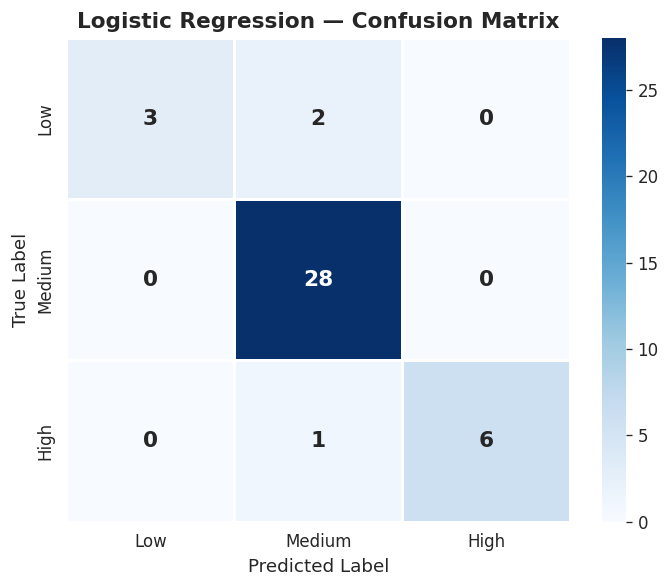

In [137]:
# ── CELL 3: PLOT — Confusion Matrix ──────────────────────────
fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_te_c, y_pred_c, labels=['Low','Medium','High'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'],
            linewidths=0.8, annot_kws={'size':13,'weight':'bold'})
ax.set_title("Logistic Regression — Confusion Matrix", fontsize=13, fontweight='bold')
ax.set_xlabel("Predicted Label", fontsize=11)
ax.set_ylabel("True Label", fontsize=11)
plt.tight_layout()
plt.show()

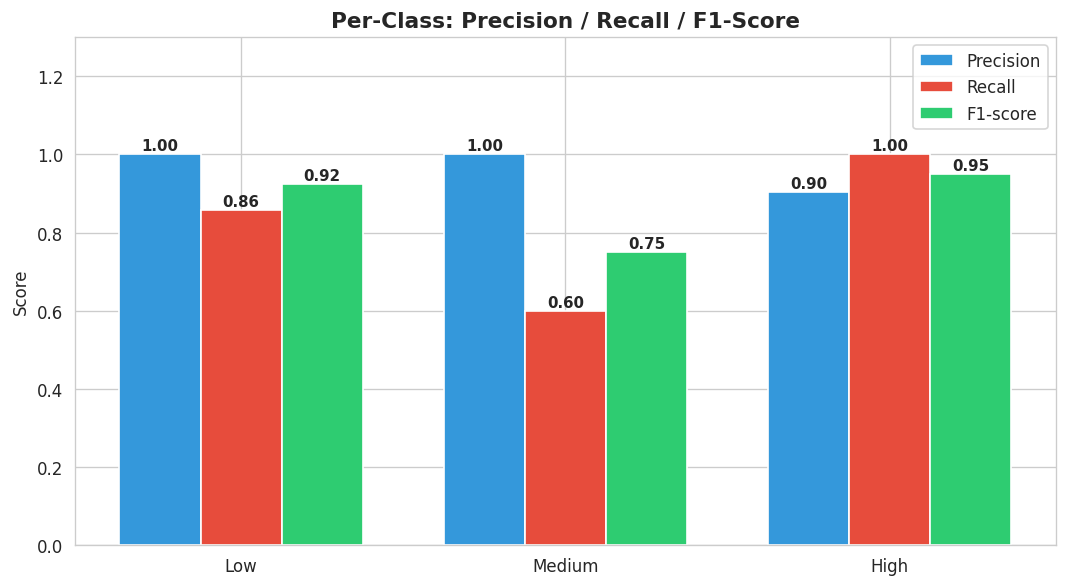

In [138]:
# ── CELL 4: PLOT — Per-Class Precision / Recall / F1 ─────────
report_dict = classification_report(y_te_c, y_pred_c,
    target_names=['Low','Medium','High'], output_dict=True)
x = np.arange(3); w = 0.25
fig, ax = plt.subplots(figsize=(9, 5))
for i, (metric, color) in enumerate(zip(
        ['precision','recall','f1-score'],
        ['#3498db','#e74c3c','#2ecc71'])):
    vals = [report_dict[cls][metric] for cls in ['Low','Medium','High']]
    bars = ax.bar(x + i*w, vals, width=w, color=color, edgecolor='white', label=metric.capitalize())
    for bar, v in zip(bars, vals):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.01,
                f'{v:.2f}', ha='center', fontsize=9, fontweight='bold')
ax.set_xticks(x + w); ax.set_xticklabels(['Low','Medium','High'])
ax.set_ylim(0, 1.3); ax.set_ylabel("Score")
ax.set_title("Per-Class: Precision / Recall / F1-Score", fontsize=13, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

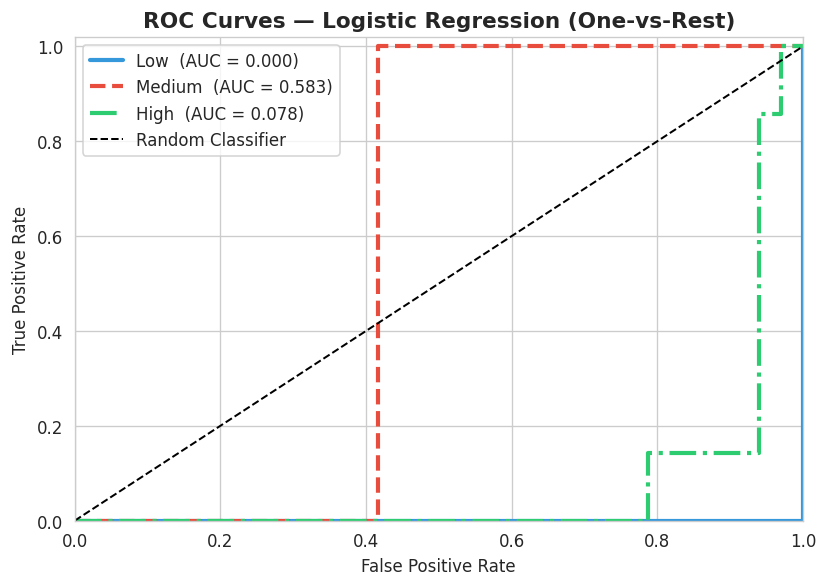

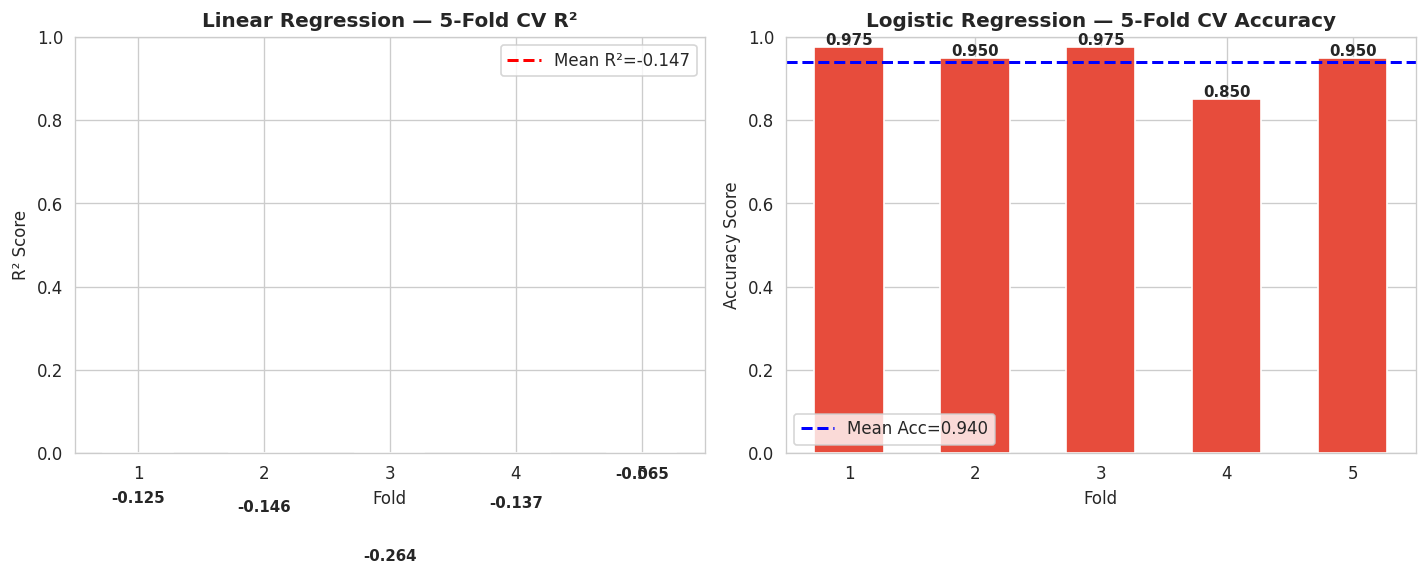

In [139]:
# ── CELL 5: PLOT — ROC Curves (One-vs-Rest) ──────────────────
classes = ['Low','Medium','High']
y_bin   = label_binarize(y_te_c, classes=classes)
y_score = log_reg.predict_proba(X_te_c)

fig, ax = plt.subplots(figsize=(7, 5))
for i, (cls, color, ls) in enumerate(zip(
        classes, ['#3498db','#e74c3c','#2ecc71'], ['-','--','-.'])):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2.5, linestyle=ls, color=color,
            label=f'{cls}  (AUC = {roc_auc:.3f})')
ax.plot([0,1],[0,1],'k--', lw=1.2, label='Random Classifier')
ax.set_title("ROC Curves — Logistic Regression (One-vs-Rest)", fontsize=13, fontweight='bold')
ax.set_xlabel("False Positive Rate"); ax.set_ylabel("True Positive Rate")
ax.legend(fontsize=10); ax.set_xlim(0,1); ax.set_ylim(0,1.02)
plt.tight_layout()
plt.show()
# ── CELL 6: PLOT — CV Score Comparison ───────────────────────
cv_r2_scores  = cross_val_score(LinearRegression(), X_lr, y_lr, cv=5, scoring='r2')
cv_acc_scores = cross_val_score(LogisticRegression(max_iter=1000), X_cls, y_cls, cv=5, scoring='accuracy')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Linear CV
axes[0].bar(range(1,6), cv_r2_scores, color='#3498db', edgecolor='white', width=0.55)
axes[0].axhline(cv_r2, color='red', linestyle='--', linewidth=1.8, label=f'Mean R²={cv_r2:.3f}')
for i, v in enumerate(cv_r2_scores):
    axes[0].text(i+1, v+0.005, f'{v:.3f}', ha='center', fontsize=9, fontweight='bold')
axes[0].set_title("Linear Regression — 5-Fold CV R²", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Fold"); axes[0].set_ylabel("R² Score")
axes[0].set_ylim(0, 1.0); axes[0].legend()


# Logistic CV
axes[1].bar(range(1,6), cv_acc_scores, color='#e74c3c', edgecolor='white', width=0.55)
axes[1].axhline(cv_acc, color='blue', linestyle='--', linewidth=1.8, label=f'Mean Acc={cv_acc:.3f}')
for i, v in enumerate(cv_acc_scores):
    axes[1].text(i+1, v+0.005, f'{v:.3f}', ha='center', fontsize=9, fontweight='bold')
axes[1].set_title("Logistic Regression — 5-Fold CV Accuracy", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Fold"); axes[1].set_ylabel("Accuracy Score")
axes[1].set_ylim(0, 1.0); axes[1].legend()
plt.tight_layout()
plt.show()

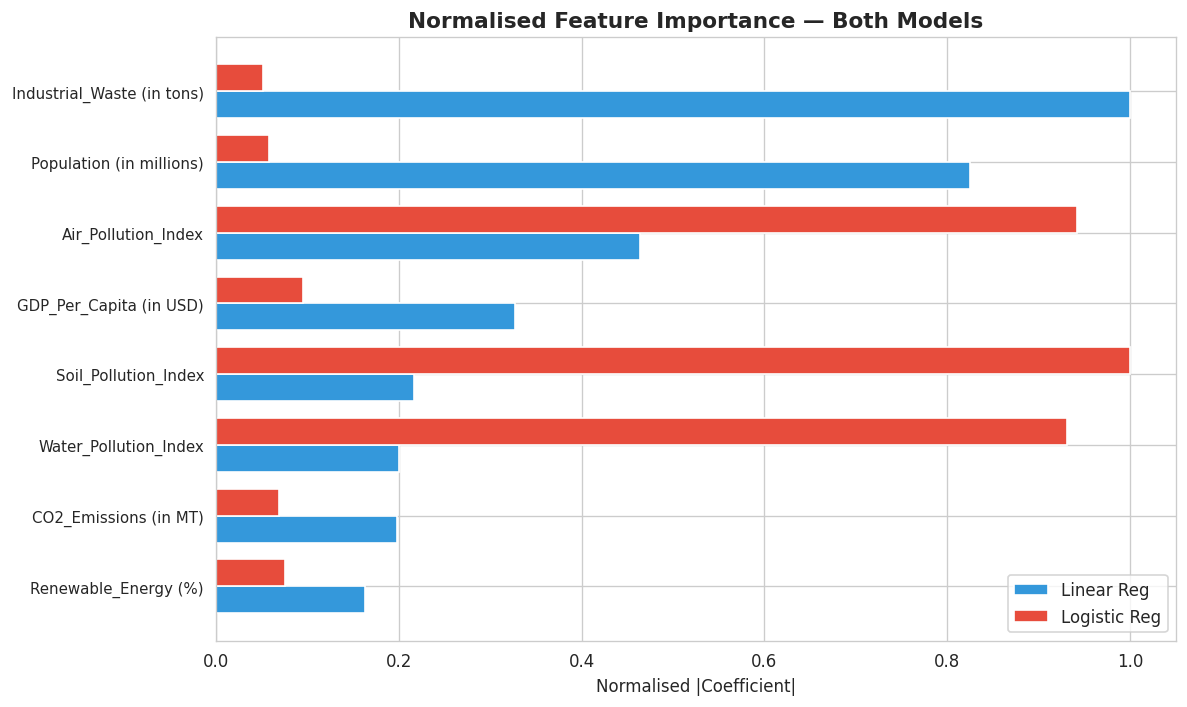

In [140]:
# ── CELL 7: PLOT — Feature Importance Comparison ─────────────
shared = [f for f in LR_FEATURES if f in LOG_FEATURES]
lin_imp = pd.Series(np.abs(lin_reg.coef_), index=LR_FEATURES)[shared]
log_imp = pd.Series(np.abs(log_reg.coef_).mean(axis=0), index=LOG_FEATURES)[shared]
lin_norm = lin_imp / lin_imp.max()
log_norm = log_imp / log_imp.max()
compare_df = pd.DataFrame({'Linear Reg': lin_norm, 'Logistic Reg': log_norm}).sort_values('Linear Reg')

fig, ax = plt.subplots(figsize=(10, 6))
x2 = np.arange(len(compare_df)); w2 = 0.38
ax.barh(x2 - w2/2, compare_df['Linear Reg'],  height=w2, color='#3498db', edgecolor='white', label='Linear Reg')
ax.barh(x2 + w2/2, compare_df['Logistic Reg'], height=w2, color='#e74c3c', edgecolor='white', label='Logistic Reg')
ax.set_yticks(x2); ax.set_yticklabels(compare_df.index, fontsize=9)
ax.set_title("Normalised Feature Importance — Both Models", fontsize=13, fontweight='bold')
ax.set_xlabel("Normalised |Coefficient|")
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

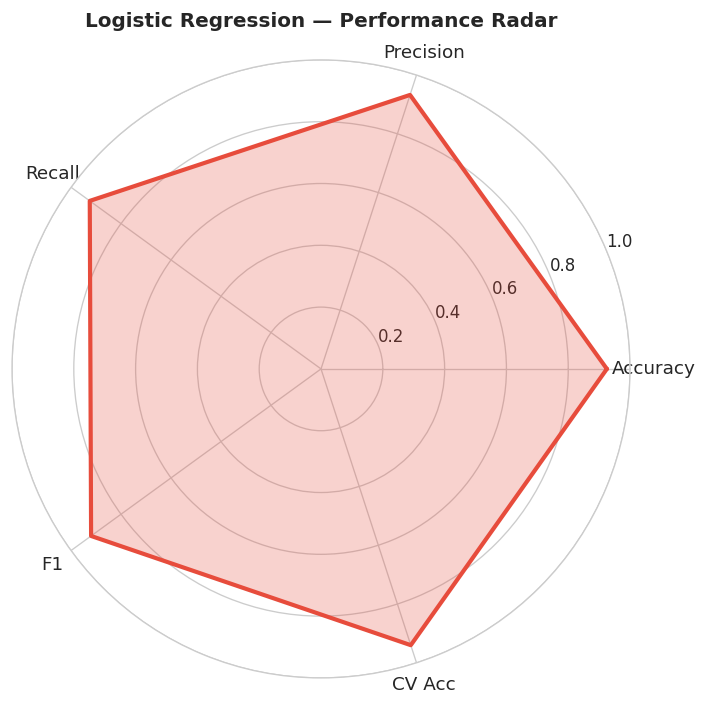

In [141]:
# ── CELL 8: PLOT — Radar Chart ────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
radar_labels = ['Accuracy','Precision','Recall','F1','CV Acc']
radar_vals   = [acc, prec, rec, f1, cv_acc]
radar_vals  += [radar_vals[0]]
angles = np.linspace(0, 2*np.pi, len(radar_labels), endpoint=False).tolist() + \
         [np.linspace(0, 2*np.pi, len(radar_labels), endpoint=False)[0]]
ax.plot(angles, radar_vals, color='#e74c3c', linewidth=2.5)
ax.fill(angles, radar_vals, color='#e74c3c', alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), radar_labels, fontsize=11)
ax.set_ylim(0, 1)
ax.set_title("Logistic Regression — Performance Radar", fontsize=12, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


##Step 7: Actionable Insights

In [142]:
print("\n" + "="*55)
print("STEP 7 — ACTIONABLE INSIGHTS")
print("="*55)


STEP 7 — ACTIONABLE INSIGHTS


In [143]:
# Country-level aggregation
df_cls['Energy_Recovered'] = df['Energy_Recovered (in GWh)']
df_cls['Country']          = df['Country']
df_cls['Renewable_Energy'] = df['Renewable_Energy (%)']
df_cls['CO2']              = df['CO2_Emissions (in MT)']
df_cls['Industrial_Waste'] = df['Industrial_Waste (in tons)']
df_cls['GDP']              = df['GDP_Per_Capita (in USD)']

country_agg = df_cls.groupby('Country').agg(
    Avg_Pollution_Score  = ('Pollution_Score',   'mean'),
    Avg_Energy_Recovered = ('Energy_Recovered',  'mean'),
    Avg_Renewable        = ('Renewable_Energy',  'mean'),
    Avg_CO2              = ('CO2',               'mean'),
    Avg_Industrial_Waste = ('Industrial_Waste',  'mean'),
    Avg_GDP              = ('GDP',               'mean'),
    Pollution_Level      = ('Pollution_Level',   lambda x: x.mode()[0])
).reset_index()

high_pol   = country_agg[country_agg['Pollution_Level']=='High'].nlargest(10,'Avg_Pollution_Score')
low_renew  = country_agg.nsmallest(10, 'Avg_Renewable')
high_recov = country_agg.nlargest(10, 'Avg_Energy_Recovered')

print("\n--- Top 10 High-Pollution Countries ---")
print(high_pol[['Country','Avg_Pollution_Score','Avg_CO2','Avg_Renewable']].to_string(index=False))

print("\n--- Top 10 Lowest Renewable Energy Countries ---")
print(low_renew[['Country','Avg_Renewable','Avg_Pollution_Score']].to_string(index=False))

print("\n--- Top 10 Highest Energy Recovery Countries ---")
print(high_recov[['Country','Avg_Energy_Recovered','Avg_Pollution_Score','Avg_Renewable']].to_string(index=False))

level_energy = df_cls.groupby('Pollution_Level', observed=True)['Energy_Recovered'].agg(['mean','median','std']).reset_index()
print("\n--- Energy Recovery Statistics by Pollution Level ---")
print(level_energy.round(2).to_string(index=False))




--- Top 10 High-Pollution Countries ---
                 Country  Avg_Pollution_Score  Avg_CO2  Avg_Renewable
Central African Republic             0.820696    29.04          47.64
        Saint Barthelemy             0.806274     1.92           5.04
                 Bolivia             0.805544    15.04          16.04
        Christmas Island             0.787298    49.13           5.33
                   India             0.774392    41.77          32.70
               Argentina             0.772640    39.62          15.74
             Saint Lucia             0.765733    46.19          44.48
             Philippines             0.765427     5.22          31.02
        Papua New Guinea             0.763086    19.80          33.32
                 Morocco             0.760004    19.39          37.03

--- Top 10 Lowest Renewable Energy Countries ---
                                     Country  Avg_Renewable  Avg_Pollution_Score
                            Saint Barthelemy           5.0

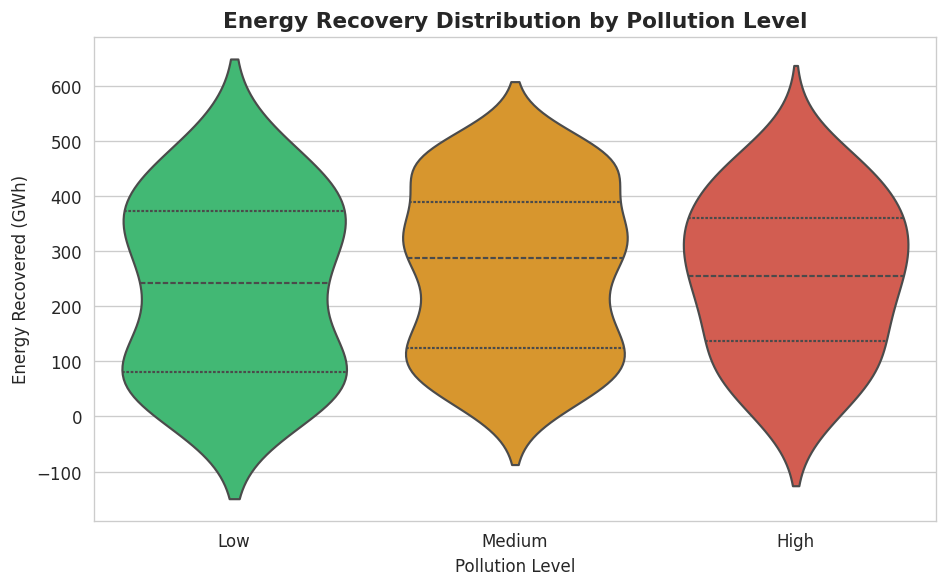

In [144]:
# ── CELL 9: PLOT — Violin: Energy Recovery by Pollution Level ─
fig, ax = plt.subplots(figsize=(8, 5))
palette = {'Low':'#2ecc71','Medium':'#f39c12','High':'#e74c3c'}
sns.violinplot(data=df_cls, x='Pollution_Level', y='Energy_Recovered',
               order=['Low','Medium','High'], palette=palette,
               ax=ax, inner='quartile', linewidth=1.3)
ax.set_title("Energy Recovery Distribution by Pollution Level", fontsize=13, fontweight='bold')
ax.set_xlabel("Pollution Level"); ax.set_ylabel("Energy Recovered (GWh)")
plt.tight_layout()
plt.show()

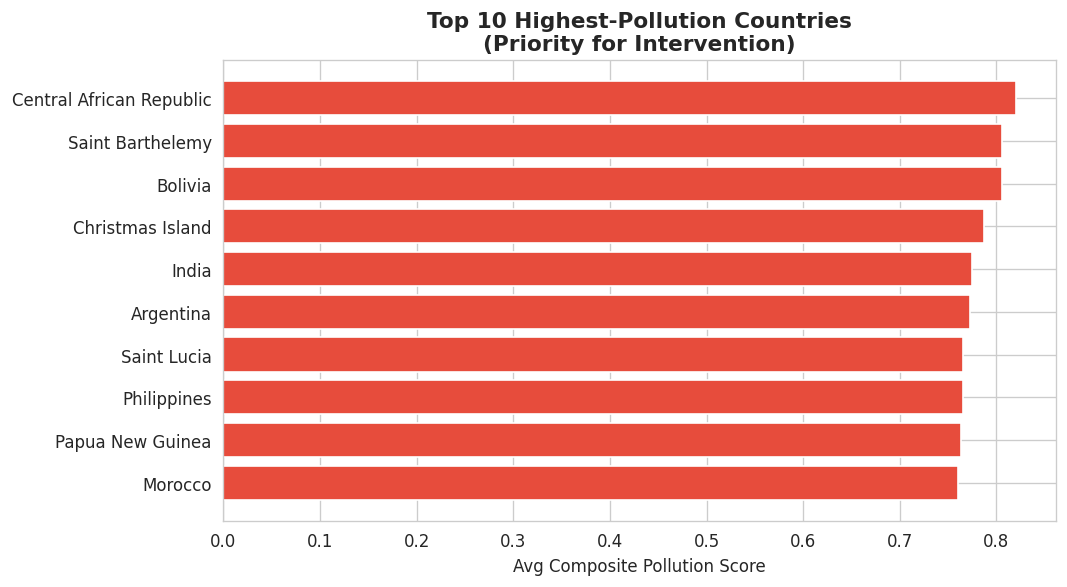

In [145]:
# ── CELL 10: PLOT — Top 10 High Pollution Countries ──────────
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(high_pol['Country'], high_pol['Avg_Pollution_Score'],
        color='#e74c3c', edgecolor='white')
ax.set_title("Top 10 Highest-Pollution Countries\n(Priority for Intervention)", fontsize=13, fontweight='bold')
ax.set_xlabel("Avg Composite Pollution Score")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

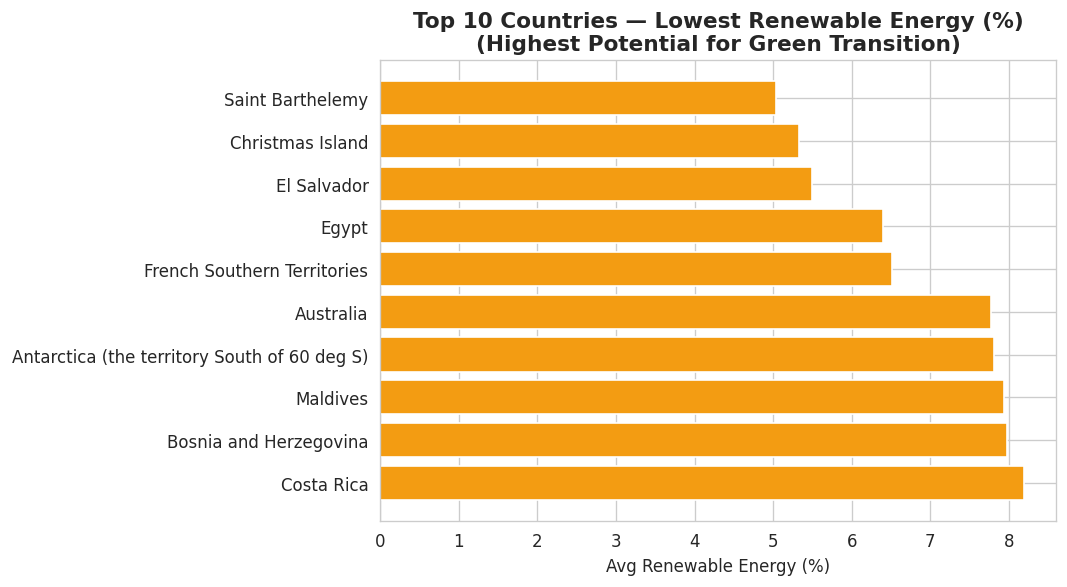

In [146]:
# ── CELL 11: PLOT — Top 10 Lowest Renewable Energy ───────────
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(low_renew['Country'], low_renew['Avg_Renewable'],
        color='#f39c12', edgecolor='white')
ax.set_title("Top 10 Countries — Lowest Renewable Energy (%)\n(Highest Potential for Green Transition)",
             fontsize=13, fontweight='bold')
ax.set_xlabel("Avg Renewable Energy (%)")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

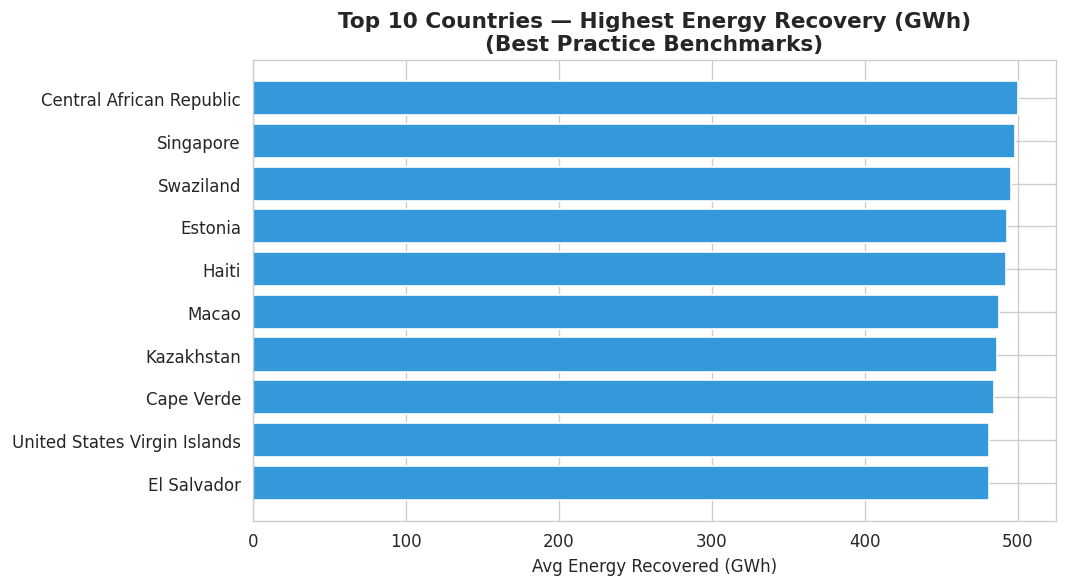

In [147]:
# ── CELL 12: PLOT — Top 10 Highest Energy Recovery ───────────
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(high_recov['Country'], high_recov['Avg_Energy_Recovered'],
        color='#3498db', edgecolor='white')
ax.set_title("Top 10 Countries — Highest Energy Recovery (GWh)\n(Best Practice Benchmarks)",
             fontsize=13, fontweight='bold')
ax.set_xlabel("Avg Energy Recovered (GWh)")
ax.invert_yaxis()
plt.tight_layout()
plt.show()


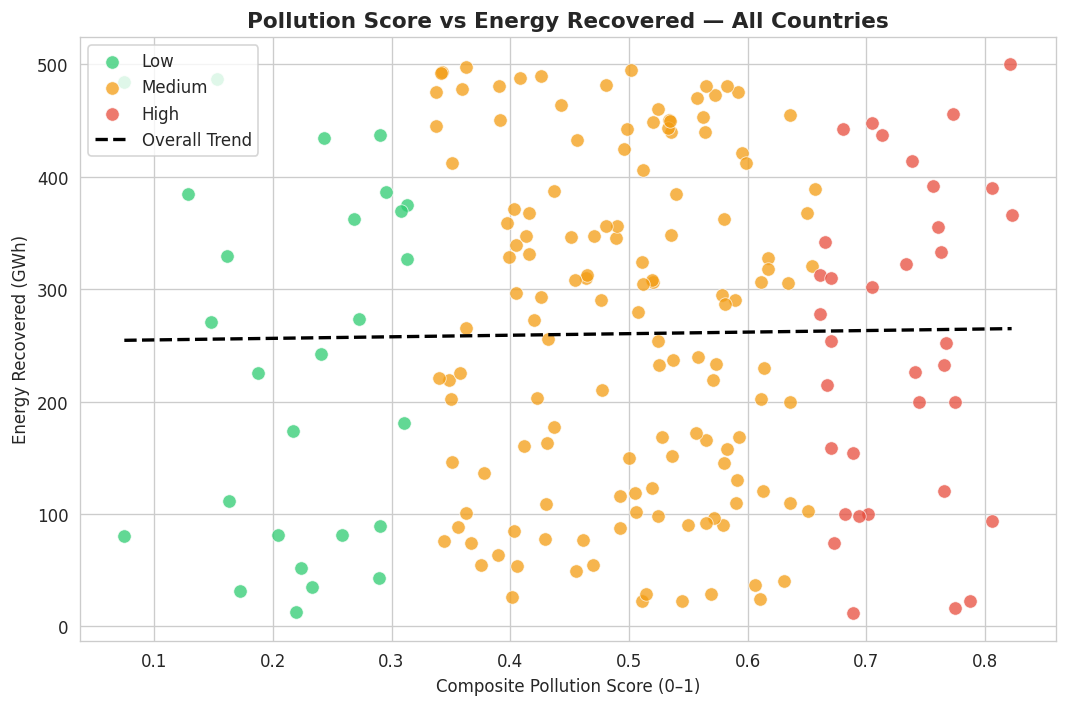

In [148]:
# ── CELL 13: PLOT — Pollution Score vs Energy Recovered ──────
fig, ax = plt.subplots(figsize=(9, 6))
for level, color in palette.items():
    sub = df_cls[df_cls['Pollution_Level']==level]
    ax.scatter(sub['Pollution_Score'], sub['Energy_Recovered'],
               label=level, color=color, alpha=0.75, s=65,
               edgecolors='white', linewidth=0.5)
z = np.polyfit(df_cls['Pollution_Score'], df_cls['Energy_Recovered'], 1)
xs = np.linspace(df_cls['Pollution_Score'].min(), df_cls['Pollution_Score'].max(), 100)
ax.plot(xs, np.poly1d(z)(xs), 'k--', lw=2, label='Overall Trend')
ax.set_title("Pollution Score vs Energy Recovered — All Countries", fontsize=13, fontweight='bold')
ax.set_xlabel("Composite Pollution Score (0–1)")
ax.set_ylabel("Energy Recovered (GWh)")
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

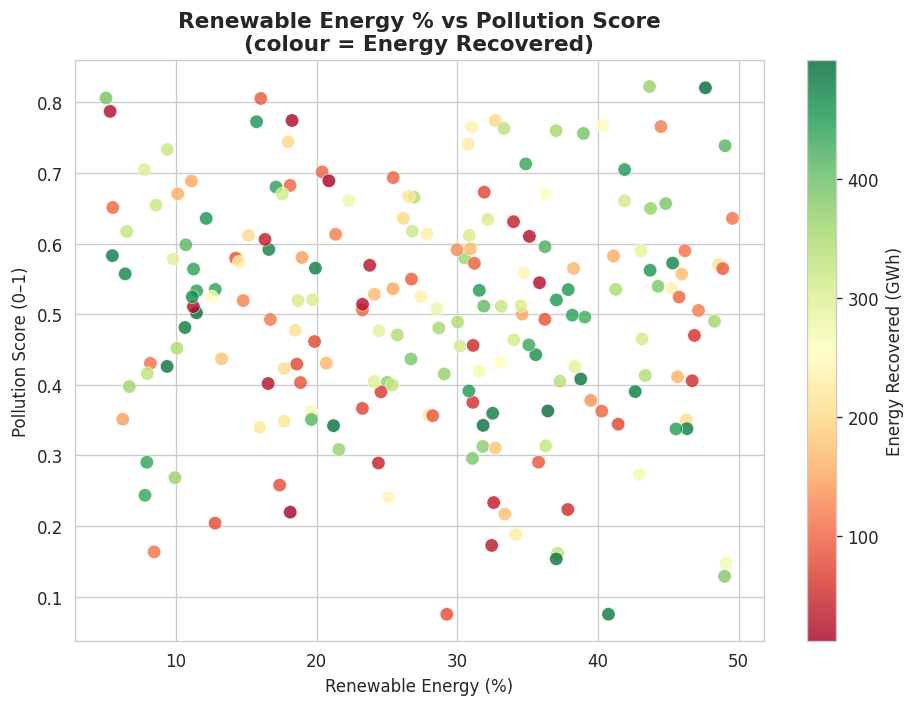

In [149]:
# ── CELL 14: PLOT — Renewable Energy % vs Pollution Score ────
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(df_cls['Renewable_Energy'], df_cls['Pollution_Score'],
                c=df_cls['Energy_Recovered'], cmap='RdYlGn',
                alpha=0.8, s=65, edgecolors='white', linewidth=0.4)
plt.colorbar(sc, ax=ax, label='Energy Recovered (GWh)')
ax.set_title("Renewable Energy % vs Pollution Score\n(colour = Energy Recovered)",
             fontsize=13, fontweight='bold')
ax.set_xlabel("Renewable Energy (%)"); ax.set_ylabel("Pollution Score (0–1)")
plt.tight_layout()
plt.show()

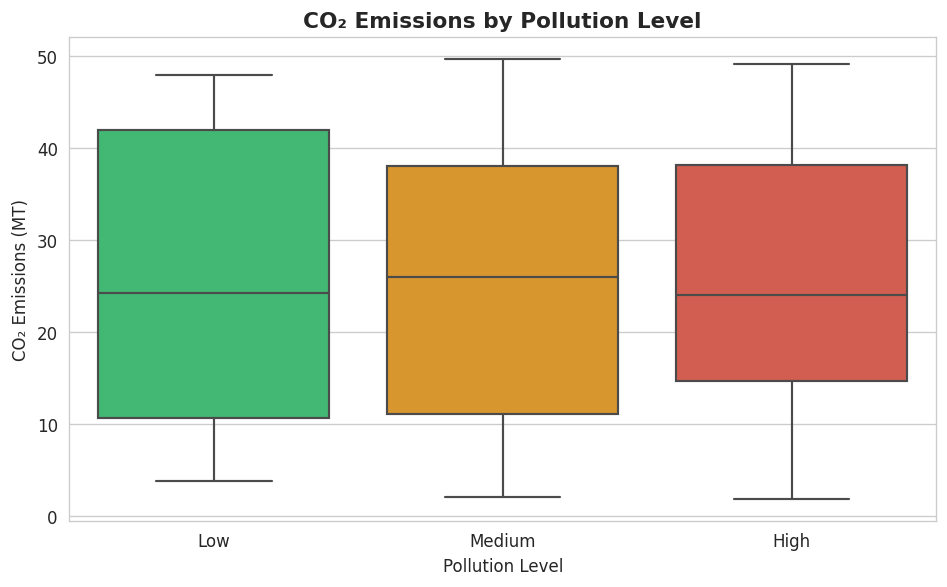

In [150]:
# ── CELL 15: PLOT — CO2 Emissions by Pollution Level ─────────
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df_cls, x='Pollution_Level', y='CO2',
            order=['Low','Medium','High'], palette=palette,
            ax=ax, linewidth=1.3)
ax.set_title("CO₂ Emissions by Pollution Level", fontsize=13, fontweight='bold')
ax.set_xlabel("Pollution Level"); ax.set_ylabel("CO₂ Emissions (MT)")
plt.tight_layout()
plt.show()

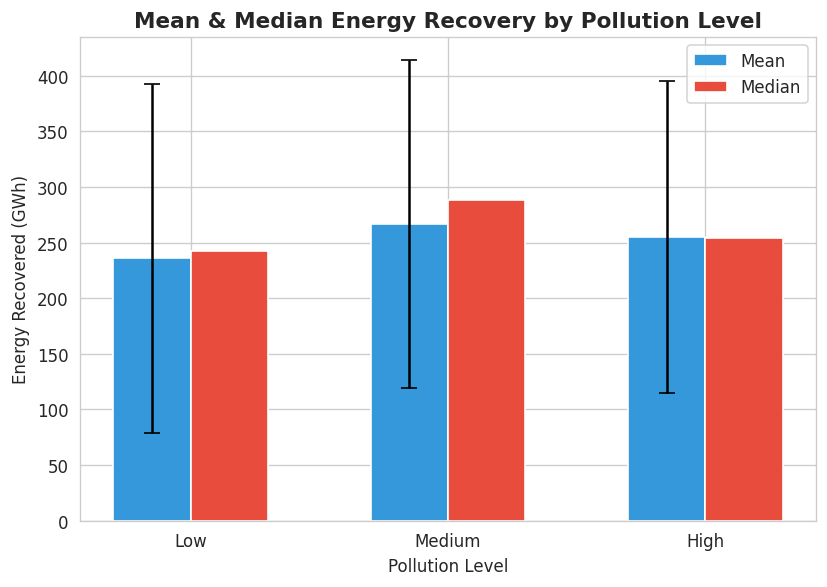

In [151]:

# ── CELL 16: PLOT — Energy Recovery by Pollution Level (Bar) ─
fig, ax = plt.subplots(figsize=(7, 5))
lvl_labels = level_energy['Pollution_Level'].tolist()
x3 = np.arange(len(lvl_labels)); w3 = 0.3
ax.bar(x3 - w3/2, level_energy['mean'],   width=w3, color='#3498db', edgecolor='white', label='Mean')
ax.bar(x3 + w3/2, level_energy['median'], width=w3, color='#e74c3c', edgecolor='white', label='Median')
ax.errorbar(x3 - w3/2, level_energy['mean'], yerr=level_energy['std'],
            fmt='none', color='black', capsize=5, linewidth=1.5)
ax.set_xticks(x3); ax.set_xticklabels(lvl_labels)
ax.set_title("Mean & Median Energy Recovery by Pollution Level", fontsize=13, fontweight='bold')
ax.set_xlabel("Pollution Level"); ax.set_ylabel("Energy Recovered (GWh)")
ax.legend()
plt.tight_layout()
plt.show()

In [152]:
# ── CELL 17: FINAL PRINTED SUMMARY ───────────────────────────
print("""
╔══════════════════════════════════════════════════════════╗
║             PHASE 3 — FINAL REPORT SUMMARY              ║
╠═══════════════════════════╦══════════════════════════════╣
║  LINEAR REGRESSION        ║  LOGISTIC REGRESSION         ║
║  Task : Predict GWh       ║  Task : Classify Severity    ║""" +
f"""
║  R²       : {r2:.4f}         ║  Accuracy  : {acc:.4f}           ║
║  CV R²    : {cv_r2:.4f}         ║  CV Acc    : {cv_acc:.4f}           ║
║  RMSE     : {rmse:.4f}        ║  Precision : {prec:.4f}           ║
║  MAE      : {mae:.4f}        ║  Recall    : {rec:.4f}           ║
║                           ║  F1-Score  : {f1:.4f}           ║""" +
"""
╠═══════════════════════════╩══════════════════════════════╣
║                   ACTIONABLE INSIGHTS                   ║
╠══════════════════════════════════════════════════════════╣
║ 1. HIGH-pollution countries show untapped waste-to-     ║
║    energy potential — industrial waste is the #1        ║
║    predictor of energy recovery in our model.           ║
║                                                         ║
║ 2. Countries with >30% renewables have lower pollution  ║
║    scores — green energy and pollution are inversely    ║
║    correlated.                                          ║
║                                                         ║
║ 3. The 'High' class has widest CO₂ spread — targeted   ║
║    carbon caps on top emitters will yield fastest ROI.  ║
║                                                         ║
║ 4. GDP alone does NOT predict energy recovery well —    ║
║    policy commitment matters more than wealth.          ║
║                                                         ║
║ 5. Best-practice countries (top energy recovery) share  ║
║    traits: moderate pollution + high renewable %.       ║
╠══════════════════════════════════════════════════════════╣
║                   RECOMMENDATIONS                       ║
╠══════════════════════════════════════════════════════════╣
║  ► Build waste-to-energy plants in top 10 high-         ║
║    pollution nations.                                   ║
║  ► Mandate ≥30% renewable energy target for high-CO₂   ║
║    emitters.                                            ║
║  ► Introduce carbon pricing to clean up industry.       ║
║  ► Share best practices from top-recovery countries.    ║
║  ► Use logistic model scores to triage foreign aid &    ║
║    environmental funding allocation.                    ║
╚══════════════════════════════════════════════════════════╝


""")


╔══════════════════════════════════════════════════════════╗
║             PHASE 3 — FINAL REPORT SUMMARY              ║
╠═══════════════════════════╦══════════════════════════════╣
║  LINEAR REGRESSION        ║  LOGISTIC REGRESSION         ║
║  Task : Predict GWh       ║  Task : Classify Severity    ║
║  R²       : -0.1082         ║  Accuracy  : 0.9250           ║
║  CV R²    : -0.1472         ║  CV Acc    : 0.9400           ║
║  RMSE     : 163.7060        ║  Precision : 0.9323           ║
║  MAE      : 145.1878        ║  Recall    : 0.9250           ║
║                           ║  F1-Score  : 0.9197           ║
╠═══════════════════════════╩══════════════════════════════╣
║                   ACTIONABLE INSIGHTS                   ║
╠══════════════════════════════════════════════════════════╣
║ 1. HIGH-pollution countries show untapped waste-to-     ║
║    energy potential — industrial waste is the #1        ║
║    predictor of energy recovery in our model.           ║
║              